# Accuracy and bias of Bulgarian parliamentary election polls, 2014-2024
by Sava Stoyanov

## Introduction

Election polling aggregation in a multi-party, proportional representation system differs significantly from systems like the U.S.'s first-past-the-post model. In a system like Bulgaria’s, where voters choose from multiple political parties and seats are distributed based on the proportion of the vote each party receives, pollsters face additional challenges. **Poll aggregation involves combining results from multiple polling firms to reduce the impact of individual biases and errors.** These aggregations help smooth out volatility caused by factors like small sample sizes or varying methodologies between polling agencies. Aggregators typically weigh polls based on factors like sample size, recency, and the historical accuracy of the polling firm.

However, **in proportional representation systems, aggregation must account for vote shares being split across a large number of parties, many of which may fall close to the electoral threshold for winning seats.** In these contexts, small polling errors can lead to significant discrepancies between predicted and actual seat distributions. This makes accurate poll aggregation critical not just for forecasting overall outcomes but also for assessing coalition-building dynamics, as parties often need to form alliances to govern. By combining polls and adjusting for biases inherent in each, aggregating aims to provide a more reliable snapshot of voter intentions, though **the complexity of multi-party systems adds layers of uncertainty.**

## Literative review

By no means a proper or exhaustive literature review, this is intended to give the reader an extremely brief summary of why this problem matters and how others have gone about solving it.

**Why election polling matters**

Voters' perceptions of election polling can affect election outcomes, as demonstrated by [Boukouras et al., (2023)](https://doi.org/10.1016/j.ejpoleco.2023.102383). That is only one reason it is important for election polling to be as accurate as possible.

**Poll aggregation**

In an effort to more accurately forecast a given election, all public polls conducted about it can be "aggregated" so as to produce a more complete picture, and hopefully avoid any one poll's errors or biases. The classic example is [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/president-general/2024/national/), while aggregators working with European elections include [Politico's Poll of Polls](https://www.politico.eu/europe-poll-of-polls/bulgaria/) and [EuropeElects](https://europeelects.eu/bulgaria/). One of the issues with the sector is the fact that aggregators do not (or rather, no longer) like to share their datasets even though they are made up of publicly available data, and that similarly they usually use proprietary methods and models. This is also part of the challenge of studying polling aggregation, or attempting to become a part of the industry. For a more complete overview of poll aggregation, see [Jackson (2016)](https://doi.org/10.1093/oxfordhb/9780190213299.013.28).

**Proportional representation electoral systems**

The main problem in terms of literature with the present study is the lack of research done of polling accuracy outside of the US and UK, which both use a First-Past-The-Post (FPTP) electoral system. Proportional representation (PR) systems have a host of features different from FPTP ones, which become problems when it come to polling. One such problem is that PR systems often lack a stable party systems, with parties tending to break up, merge, form coalitions and so on between election cycles. Indeed, this is the case in Bulgaria, too - over the studied period from 2014 to 2024, only 3 parties have contested all elections in a more-or-less unchanged fashion. All others have mutated in and out of coalitions, some have ceased to exist while others have been created. Another problem presented by PR systems is their variety - from how many seats are elected by one electoral district, to the existence or lack of a threshold to enter parliament, and so on. All this to say, PR systems are a lot more complicated and a lot less studied (in terms of public polling, not in terms of electoral outcomes) than FPTP ones. For a great overview of electoral systems and their effects on electoral outcomes, see [Shugart & Taagepera (2017) ](
https://doi.org/10.1017/9781108261128)

**An example of a similar study**

I found only one work that is very similar to what this study is trying to achieve, yet more ambitious. [Pitas (2023)](https://arxiv.org/abs/2307.10022) proposes a dataset similar to the one used by EuropeElects, but one which is open-source, and then proceeds to measure pollster data like the present study, albeit using different methods..

## Overview of the work

This study intends to:

0. **collect and tidy data about the Bulgarian parliamentary election results from 2014 to 2024, as well as the election polling** for the same election cycles
1. **calculate the errors for each party in each poll about each election** (by subtracting the election result data from the election polling data)
2. **calculate the average error of each poll for each election** (by summing the absolute values of valid error values of all errors of one poll and dividing the sum by the number of valid values)
3. **weight each poll proportionate to how close to the election it was done** (by giving the poll(s) closest to an election a weight of 1, poll(s) further than 60 days from an election a weight of 0.5, and a proportional weight to polls in between)
4. **calculate the weighted average error for each pollster for each election** (by calculating the weighed average error for each poll done by pollster A, then summing the weighted average errors for all polls by pollster A, summing the weights for all polls by pollster A, and dividing the sum of weighted average errors by the sum of weights)
5. **calculate and chart the overall weighted average error for each pollster over all 8 elections** (by summing weighted average error values for pollster A for each election they polled, and dividing by the number of elections they polled)
6. **calculate and chart the overall pollster accuracy by election cycle** (by averaging all pollsters' weighted average error for each election)
7. **calculate and chart each pollster's bias against/towards every "party family"** (by defining a party family identification for each party, summing the errors towards all parties from the same party family in each poll, and summing these errors towards each party family in each poll done by the same pollster, and dividing these sums of errors by the number of polls the pollster did)

**This could in future studies be extended to creating a de-biasing model** that could be used to de-bias future polls in order to make more accurate predictions - especially useful in the context of a polling aggregator akin to 538 or Politico's Poll of Polls.

## Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection

### Election polls

Bulgarian election polls are most easily accessible on the Wikipedia pages about each election:

- [June 2024](https://en.wikipedia.org/wiki/June_2024_Bulgarian_parliamentary_election)
- [April 2023](https://en.wikipedia.org/wiki/2023_Bulgarian_parliamentary_election)
- [October 2022](https://en.wikipedia.org/wiki/2022_Bulgarian_parliamentary_election)
- [November 2021](https://en.wikipedia.org/wiki/2021_Bulgarian_general_election)*
- [July 2021](https://en.wikipedia.org/wiki/July_2021_Bulgarian_parliamentary_election)
- [April 2021](https://en.wikipedia.org/wiki/April_2021_Bulgarian_parliamentary_election)**
- [March 2017](https://en.wikipedia.org/wiki/2017_Bulgarian_parliamentary_election)
- [October 2014](https://en.wikipedia.org/wiki/2014_Bulgarian_parliamentary_election)***

In order to procure the data in .csv formatting, I used [wikitable2csv](https://wikitable2csv.ggor.de) by [Gregor Weichbrodt](https://github.com/gambolputty), also available on [GitHub](https://github.com/gambolputty/wikitable2csv) under a MIT license.

All of the data procured thusly is available in /data.

*: For some reason the English version of the page on the November 2021 election cannot be processed by wikitable2csv. I have used the Bulgarian version of the page instead: [Ноември 2021](https://bg.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%BB%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D0%B8_%D0%B8%D0%B7%D0%B1%D0%BE%D1%80%D0%B8_%D0%B2_%D0%91%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F_(%D0%BD%D0%BE%D0%B5%D0%BC%D0%B2%D1%80%D0%B8_2021)). I suspect the problem has something to do with the fact that the English version has been merged with the page about the presidential elections held at the same time, but I do not know at this time.

**: The data in the English version of the page on the April 2021 election is inexplicably cut off mid-February, while the Bulgarian version of the page [Април 2021](https://bg.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%BB%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D0%B8_%D0%B8%D0%B7%D0%B1%D0%BE%D1%80%D0%B8_%D0%B2_%D0%91%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F_(%D0%B0%D0%BF%D1%80%D0%B8%D0%BB_2021)) includes polls up to the end of March, so I'm using that.

***: The data in the English version of the page on the October 2014 election contains only two relevant polls, while the Bulgarian version of the page [Октомври 2014](https://bg.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%BB%D0%B0%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D0%B8_%D0%B8%D0%B7%D0%B1%D0%BE%D1%80%D0%B8_%D0%B2_%D0%91%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F_(2014)) contains a more or less normal amount, so I'm using that.

NB: In an ideal setting, the election polling data would be collected directly from the primary source, i.e. the polling companies. However, the way they publish their data - only in Bulgarian and in vastly varying formats (from presentations to .pdf files to .doc files to just articles online) makes it impractical. This likely introduces some errors in the data, but is the only feasible way the data can be made workable.

### Election results

Since election results as a whole are a much smaller dataset, and their accuracy is of the utmost importance, I will procure them directly from the [Central Election Comission website](https://results.cik.bg). While they are available in .txt format, for the needs of this study it will take considerably less time and resources to manually copy the relevant results (usually no more than 8 values per election cycle).

I have chosen to save the election results as dictionaries as they can easily be subtracted from a dataframe's values (as we'll do later) while being harder to confuse than arrays due to retaining the "label" of each party.

In order to help me collect the results of only the parties which were included in each election cycle's public polling, I have made simple arrays containing the list of relevant parties after doing the data tidying and cleaning below:

In [17]:
june_2024_party_list = ['GERB-SDS', 'DPS', 'PP-DB', 'Revival', 'BSPzB', 'ITN', 'SB', 'SBG', 'Left', 'BV']
april_2023_party_list = ['GERB-SDS', 'PP-DB', 'Revival', 'DPS', 'BSPzB', 'ITN', 'BV', 'Left']
october_2022_party_list = ['GERB-SDS', 'PP', 'DPS', 'Revival', 'BSPzB', 'DB', 'BV', 'ITN', 'ISBG', 'VMRO']
november_2021_party_list = ['PP', 'GERB-SDS', 'DPS', 'BSPzB', 'ITN', 'DB', 'Revival', 'ISBG', 'VMRO']
july_2021_party_list = ['ITN', 'GERB-SDS', 'BSPzB', 'DB', 'DPS', 'ISBG', 'BP', 'Revival']
april_2021_party_list = ['GERB-SDS', 'ITN', 'BSPzB', 'DPS', 'DB',  'ISBG', 'VMRO', 'Revival','Volya-NFSB']
march_2017_party_list = ['GERB', 'BSPzB', 'OP', 'DPS', 'Volya', 'RB', 'DB', 'ABV']
october_2014_party_list = ['GERB', 'BSPzB', 'DPS', 'RB', 'PF', 'BBC', 'Ataka', 'ABV']

In [18]:
election_names = ['June 2024', 'April 2023', 'October 2022', 'November 2021', 'July 2021', 'April 2021', 'March 2017', 'October 2014']

In [19]:
june_2024_election_result = {'GERB-SDS' : 24.71,
                             'DPS': 17.06,
                             'PP-DB': 14.33,
                             'Revival' : 13.78,
                             'BSP': 7.06,
                             'ITN' : 5.96,
                             'SB': 1.57,
                             'SBG': 1.47,
                             'Left': 0.71,
                             'BV': 0.57,
                            }

# we are omitting the "Greatness" election results 
# because they were not a part of public polling at all
# for the record, they got 4.65% of the vote

In [20]:
april_2023_election_result = {'GERB-SDS' : 26.49,
                              'PP-DB': 24.56,
                              'Revival' : 14.16,
                              'DPS': 13.75,
                              'BSP': 8.93,
                              'ITN' : 4.11,
                              'BV': 3.06,
                              'Left': 2.23,                            
                            }

In [21]:
october_2022_election_result = {'GERB-SDS' : 25.33,
                                'PP' : 20.20,
                                'DPS' : 13.75,
                                'Revival' : 10.18,
                                'BSP': 9.30,
                                'DB' : 7.45,
                                'BV': 4.63,
                                'ITN' : 3.83,
                                'ISBG': 1.01,
                                'VMRO': 0.81,
                            }

In [22]:
november_2021_election_result = {'PP' : 25.67,
                                 'GERB-SDS' : 22.74,
                                 'DPS' : 13.00,
                                 'BSP': 10.21,
                                 'ITN' : 9.52,
                                 'DB' : 6.37,
                                 'Revival' : 4.86,
                                 'BV': 4.63,
                                 'ISBG': 2.29,
                                 'VMRO': 1.08,
                            }

In [23]:
july_2021_election_result = {'ITN' : 24.08,
                             'GERB-SDS' : 23.51,
                             'BSP': 13.39,
                             'DB' : 12.64,
                             'DPS' : 10.71,
                             'ISBG': 5.01,
                             'BP': 3.14,
                             'Revival' : 3.01,
                            }

In [24]:
april_2021_election_result = {'GERB-SDS' : 26.18,
                              'ITN': 17.66,
                              'BSP': 15.01,
                              'DPS' : 10.51,
                              'DB' : 9.45,
                              'ISBG': 4.72,
                              'VMRO': 3.64,
                              'Revival' : 2.45,
                              'Volya-NFSB' : 2.37,
                            }

In [25]:
march_2017_election_result = {'GERB' : 33.54,
                              'BSP': 27.93,
                              'OP': 9.31,
                              'DPS' : 9.24,
                              'Volya': 4.26,
                              'RB' : 3.14,
                              'DB': 2.96,
                              'ABV' : 1.59,
                            }

In [26]:
october_2014_election_result = {'GERB' : 32.67,
                                'BSP': 15.40,
                                'DPS' : 14.84,
                                'RB': 8.89,
                                'PF': 7.28,
                                'BBC': 5.69,
                                'Ataka' : 4.52,
                                'ABV' : 4.15,
                            }

## Data cleaning and tidying

### Methodology

Our methodology focuses on cleaning, standardizing, and transforming polling data from multiple datasets to ensure consistency and comparability across different sources. 

We first standardize dashes and pollster names to resolve variations in notation, then normalize party names and ensure that date columns follow a consistent format. We use custom dictionaries to translate Bulgarian names to English equivalents and handle the various ways polling data might be presented. 

After cleaning the data, we systematically remove rows and columns that are incomplete or irrelevant, including polls older than 90 days and columns with excessive missing data. Finally, we reorder the columns for clarity and operationalize the party result data, converting strings into numeric formats for analysis.

#### Dictionaries

- **pollster_columns**: A list of all possible column names in the datasets that may contain the polling firm or source information. This includes both English and Bulgarian names.
- **pollster_mapping**: A dictionary mapping various representations of pollster names, including Bulgarian names and alternate spellings, to a standardized version. This ensures that all polling firms are recognized consistently across datasets.
- **party_mapping**: A dictionary to standardize party names and coalitions across datasets. It accounts for variations in spelling, acronyms, and translations from Bulgarian, ensuring that party results can be compared accurately.
- **date_columns**: A list of possible column names for the polling dates, covering both English and Bulgarian variants.
- **party_columns**: A comprehensive list of possible party or coalition columns that might appear in the datasets. This is used to clean and operationalize party results.

In [32]:
pollster_columns = ['Polling Firm', 'Polling firm', 'Социологическа агенция', 'Sociological agency', 'Source', 'Агенция']

In [33]:
pollster_mapping = {
'Gallup International': 'Gallup',
'Gallup' : 'Gallup',
'Alpha Research': 'Alpha Research',
'Center for Analysis and Marketing': 'CAM',
'CAM' : 'CAM',
'Exacta': 'Exacta',
'Trend' : 'Trend',
'Sova Harris' : 'Sova Harris',
'Sova Haris' : 'Sova Harris',
'Harris Owl' : 'Sova Harris',
'Mediana' : 'Mediana',
'Median' : 'Mediana',
'Market Links' : 'Market Links',
'Market links' : 'Market Links',
'Nasoca' : 'Nasoca',
'SINPI' : 'SINPI',
'Estat' : 'Estat',
'Barometer' : 'Barometer',
'Specter' : 'Specter',
'AFIS' : 'AFIS',
'Institute of Modern Politics' : 'IMP',

# translation of pollster names:

'Алфа Рисърч' : 'Alpha Research',
'Барометър' : 'Barometer',
'Галъп' : 'Gallup',
'Галъп интернешънъл' : 'Gallup',
'ЦАМ' : 'CAM',
'Медиана' : 'Mediana',
'Тренд' : 'Trend',
'Маркет Линкс' : 'Market Links',
'Екзакта' : 'Exacta',
'Сова Харис' : 'Sova Harris',
'Естат' : 'Estat',
'Спектър' : 'Specter',
'Рего' : 'Rego',
'АФИС' : 'AFIS',
'Афис' : 'AFIS',
'Болкан БГ Метрикс' : 'Balkan BG Metrics',
'Отворено общество' : 'Open Society',
'Екзакта рисърч груп' : 'Exacta',
'ИМП' : 'IMP',
'ИСИМ-МБМД' : 'ISIM-MBMD',
}

In [34]:
party_mapping = {

'GERB–\nSDS' : 'GERB-SDS',
'BSPzB': 'BSP',
'PP-DB.1' : 'PP-DB',
'IS.BG/\nLevitsata!' : 'Left',
'IS.BG' : 'ISBG',
'ISMV' : 'ISBG',
'BP' : 'BP',
'BP.1' : 'BP',
'BP.2' : 'BP',
'Left Union' : 'Left',
'Yes!' : 'DB',

# translation of acronyms:

'ГЕРБ\nСДС' : 'GERB-SDS',
'ГЕРБ\\nСДС': 'GERB-SDS',
'ГЕРБ' : 'GERB',
'БСПзБ' : 'BSP',
'БСП' : 'BSP',
'ИТН' : 'ITN',
'ДБ': 'DB',
'ДПС' : 'DPS',
'ИБГНИ' : 'ISBG',
'ИСМВ' : 'ISBG',
'ВМРО' : 'VMRO',
'Възр.' : 'Revival',
'ПП' : 'PP',
'ОП' :'OP',
'Воля\nНФСБ' : 'Volya-NFSB',
'Атака' : 'Ataka',
'АБВ' : 'ABV',
'РЗБ' : 'RzB',
'РБ' : 'RB',
'ББЦ' : 'BBC',
'ПФ' : 'PF'
}

In [35]:
date_columns = ['Fieldwork Date' ,'Fieldwork date', 'Дати на\nпроучване', 'Dates of\nstudy', 'Date', 'Дата']

In [36]:
party_columns = ['GERB-SDS', 'GERB', 'PP-DB', 'PP', 'DB', 'Revival', 'DPS', 'BSP', 'ITN', 'BV', 'Left', 'SBG', 'SB', 'VMRO', 'NDSV', 'ISBG', 'BP', 'BL', 'RzB', 'OP', 'ABV', 'Ataka', 'Volya-NFSB', 'RB', 'Volya', 'BBC', 'PF']

#### Functions

- **standardize_dashes(df)**: Replaces different types of dashes (e.g., –, —) with a standard hyphen (-) across the dataset.
- **standardize_pollster_names(df, pollster_columns, pollster_mapping)**: Renames the pollster column to polling_firm and standardizes pollster names according to a predefined dictionary.
- **standardize_party_names(df, party_mapping)**: Standardizes party and coalition names across datasets using the party_mapping dictionary.
- **translate_bulgarian_months(df)**: Translates Bulgarian month names in the last_date column to their English equivalents, enabling consistent date parsing.
- **rename_date_columns(df, date_columns)**: Renames any date-related columns to last_date to ensure consistency across datasets.
- **standardize_last_dates(df)**: Standardizes date formats in the last_date column, handling different date ranges and converting strings into proper date formats.
- **drop_unnecessary_rows(df, party_columns)**: Drops rows that either have irrelevant data, less than 20% numeric values, or contain phrases like "election" or "exit poll" in the polling_firm or last_date columns.
- **drop_unnecessary_columns(df, party_columns)**: Removes columns that are not relevant for analysis, such as those not in the list of party columns.
- **drop_old_polls(df)**: Removes polls that are older than 90 days compared to the most recent poll in the dataset.
- **operationalize_party_results(df, party_columns)**: Cleans and converts party result strings to numeric format, handling various issues like commas as decimal points and removing percentage signs.
- **drop_columns_with_nan_threshold(df, threshold=0.6)**: Drops columns where more than 60% of the values are NaN to ensure that only relevant and complete data is kept.

In [39]:
# Define function for standardizing dashes
def standardize_dashes(df):
    """
    Replace all types of dashes (e.g., –, —) with a standard dash '-' in both column names and the entire DataFrame.
    """
    # Step 1: Standardize dashes in column names
    df.columns = df.columns.str.replace('–', '-', regex=False).str.replace('—', '-', regex=False)
    
    # Step 2: Standardize dashes in the DataFrame content
    df = df.replace({'–': '-', '—': '-'}, regex=True)
    
    return df

# Define function to standardize pollster names and columns
def standardize_pollster_names(df, pollster_columns, pollster_mapping):
    """
    Renames the column that refers to the polling firm to 'polling_firm',
    and standardizes the pollster names based on substring matches in the provided dictionary.
    """
    # Step 1: Rename the column to 'polling_firm'
    for col in pollster_columns:
        if col in df.columns:
            df = df.rename(columns={col: 'polling_firm'})
    
    # Step 2: Standardize pollster names based on substring matching
    def map_pollster_name(name):
        # For each pollster, check if it contains a key from the mapping dictionary
        for key, value in pollster_mapping.items():
            if key.lower() in str(name).lower():
                return value
        return name  # If no match, return the original name

    df['polling_firm'] = df['polling_firm'].apply(map_pollster_name)
    
    return df

# Define function to standardize party names
def standardize_party_names(df, party_mapping):
    """
    Standardizes the party names using the provided party mapping dictionary.
    """
    return df.rename(columns=party_mapping)

def rename_date_columns(df, date_columns):
    """
    Renames the first found date column from 'date_columns' to 'last_date'.
    """
    for col in date_columns:
        if col in df.columns:
            df = df.rename(columns={col: 'last_date'})
            break  # Stop after the first matching column is renamed
    return df

# Define function to translate Bulgarian months to English
def translate_bulgarian_months(df):
    """
    Translates Bulgarian month names to English in the 'last_date' column.
    """
    bulgarian_to_english_months = {
        'януари': 'January',
        'яну': 'January',
        'февруари': 'February',
        'фев' : 'February',
        'март': 'March',
        'мар': 'March',
        'април': 'April',
        'апр': 'April',
        'май': 'May',
        'юни': 'June',
        'юли': 'July',
        'август': 'August',
        'авг': 'August',
        'септември': 'September',
        'сеп': 'September',
        'октомври': 'October',
        'окт': 'October',
        'ноември': 'November',
        'ное': 'November',
        'декември': 'December',
        'дек': 'December'
    }

    # Replace Bulgarian month names with English month names in 'last_date'
    df['last_date'] = df['last_date'].replace(bulgarian_to_english_months, regex=True)
    
    return df

# Define function to standardize date columns
def standardize_last_dates(df):
    """
    Standardizes the format of the 'last_date' column, using a variety of date formats.
    """
    # Normalize dashes in the 'last_date' column
    df['last_date'] = df['last_date'].str.replace('–', '-', regex=False)
    
    # Extract the last part of the date if there's a range (e.g., 'June 1-6, 2022' -> '6, 2022')
    df['last_date'] = df['last_date'].apply(lambda x: x.split('-')[-1].strip() if '-' in x else x.strip())
    
    # Define possible date formats
    date_formats = [
        '%d %B %Y',  # '6 June 2022'
        '%d %b %Y',  # '6 Jun 2022'
        '%d-%m-%Y',  # '06-06-2022'
        '%d/%m/%Y',  # '06/06/2022'
        '%B %d, %Y', # 'June 6, 2022'
        '%d %b %y',  # '6 Jun 22'
        '%b %d, %Y', # 'Jun 6, 2022'
        '%B %d %Y'   # 'June 6 2022'
    ]
    
    # Convert 'last_date' to datetime
    def parse_date(date_str):
        for fmt in date_formats:
            try:
                parsed_date = pd.to_datetime(date_str, format=fmt, errors='coerce', dayfirst=True)
                if not pd.isna(parsed_date):
                    return parsed_date
            except ValueError:
                continue
        return np.nan
    
    df['last_date'] = df['last_date'].apply(parse_date)
    
    return df

# Define function to drop unnecessary columns
def drop_unnecessary_columns(df, party_columns):
    """
    Keeps only the party result columns, 'polling_firm', and 'last_date'.
    Drops all other columns. If a party column isn't present in the dataset, it will be ignored.
    """
    # Construct the list of columns to keep
    keep_columns = [col for col in party_columns if col in df.columns] + ['polling_firm', 'last_date']
    
    # Keep only the necessary columns
    return df[keep_columns]

# Define function to drop unnecessary rows
def drop_unnecessary_rows(df, party_columns):
    """
    Drops rows where:
    - Any cell in the party columns contains a value that matches the column name.
    - Less than 20% of the characters in all party columns are numeric.
    - The polling_firm or last_date columns contain the words 'election', 'elections', 'exit poll', 'exit', or 'избори'.
    """
    def should_drop_row(row):
        """
        Checks if the row should be dropped based on the following conditions:
        1. The value in any party column matches the column name (e.g., 'PP-DB' in 'PP-DB' column).
        2. Less than 20% of the characters in the party columns are numeric.
        3. The 'polling_firm' or 'last_date' columns contain the words 'election', 'elections', 'exit poll', 'exit', or 'избори'.
        """
        total_alphabetic = 0
        total_numeric = 0
        total_chars = 0

        # Condition 3: Drop if polling_firm or last_date contain specific words
        if 'polling_firm' in df.columns and any(keyword in str(row['polling_firm']).lower() for keyword in ['election', 'elections', 'exit', 'exit poll', 'избори']):
            return True
        if 'last_date' in df.columns and any(keyword in str(row['last_date']).lower() for keyword in ['election', 'elections', 'exit', 'exit poll', 'избори']):
            return True

        # Check the party columns
        for col in party_columns:
            if col in df.columns:
                value = str(row[col])  # Ensure the value is a string

                # Condition 1: Drop if the value matches the column name
                if value == col:
                    return True  # Immediately return True to drop the row
                
                # Condition 2: Count numeric and alphabetic characters
                total_numeric += sum(c.isdigit() for c in value)
                total_alphabetic += sum(c.isalpha() for c in value)
                total_chars += len(value)  # Count total number of characters

        # Calculate percentage of numeric characters
        if total_chars > 0:
            numeric_percentage = total_numeric / total_chars
        else:
            numeric_percentage = 0

        # Condition 2: Drop if less than 20% of the characters are numeric
        if numeric_percentage < 0.20:
            return True
        
        return False  # Keep the row if none of the conditions are met

    # Apply the function to drop rows where either condition is met
    df = df[~df.apply(should_drop_row, axis=1)]
    
    return df

# Define function to drop old polls
def drop_old_polls(df):
    """
    Drops rows where the last_date is older than 90 days compared to the most recent poll.
    """
    df['last_date'] = pd.to_datetime(df['last_date'], errors='coerce')
    most_recent_date = df['last_date'].max()
    cutoff_date = most_recent_date - pd.Timedelta(days=90)
    
    return df[df['last_date'] >= cutoff_date]

# Define function to operationalize party results
def operationalize_party_results(df, party_columns):
    """
    Converts party result strings to float, handling cases with percentage symbols, newlines, commas as decimal points,
    and other extra characters.
    Specifically:
    - If the value contains a newline, it keeps the part before the newline.
    - If the value contains a percentage sign, it strips it out.
    - It replaces commas with periods for correct float conversion.
    """
    for col in party_columns:
        if col in df.columns:
            # Step 1: Remove newlines and any text after the newline
            df[col] = df[col].apply(lambda x: str(x).split('\n')[0] if isinstance(x, str) else x)
            
            # Step 2: Remove percentage signs
            df[col] = df[col].replace({'%': ''}, regex=True)
            
            # Step 3: Replace commas with periods for proper float conversion
            df[col] = df[col].replace({',': '.'}, regex=True)
            
            # Step 4: Convert to float (numeric), coerce errors to NaN
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except Exception as e:
                print(f"Error converting column '{col}' to numeric:", e)
                print("Problematic values:", df[col].head())
                raise e
            
    return df

def drop_columns_with_nan_threshold(df, threshold=0.6):
    """
    Drops columns where more than the specified percentage (default is 60%) of the values are NaN.
    
    Parameters:
        df (DataFrame): The DataFrame to process.
        threshold (float): The percentage of NaN values required to drop a column (default is 0.6).
        
    Returns:
        DataFrame: The DataFrame with columns dropped based on the NaN threshold.
    """
    # Calculate the percentage of NaN values in each column
    nan_percentage = df.isna().mean()

    # Find columns where NaN percentage exceeds the threshold
    columns_to_drop = nan_percentage[nan_percentage > threshold].index
    
    # Drop the identified columns
    df = df.drop(columns=columns_to_drop)
    
    return df

def reorder_columns(df, party_columns):
    """
    Reorders the DataFrame so that 'polling_firm' and 'last_date' are the first two columns,
    followed by the party columns in the specified order.
    """
    # Ensure the order: 'polling_firm', 'last_date', followed by the party columns
    cols_to_keep = ['polling_firm', 'last_date'] + [col for col in party_columns if col in df.columns]
    
    # Reorder the DataFrame columns
    return df[cols_to_keep]


#### Wrapper function

The clean_dataset function acts as a wrapper that ties all the individual cleaning and standardization steps together into a coherent pipeline.

In [42]:
def clean_dataset(df, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns):
    # Step 1: Standardize dashes (in both column names and values)
    df = standardize_dashes(df)
    
    # Step 2: Standardize pollster names
    df = standardize_pollster_names(df, pollster_columns, pollster_mapping)
    
    # Step 3: Standardize party names
    df = standardize_party_names(df, party_mapping)
    
    # Step 4: Rename the date columns
    df = rename_date_columns(df, date_columns)
    
    # Step 5: Translate Bulgarian months
    df = translate_bulgarian_months(df)
    
    # Step 6: Standardize the 'last_date' column
    df = standardize_last_dates(df)
    
    # Step 7: Drop unnecessary rows
    df = drop_unnecessary_rows(df, party_columns)
    
    # Step 8: Drop unnecessary columns
    df = drop_unnecessary_columns(df, party_columns)
    
    # Step 9: Drop old polls
    df = drop_old_polls(df)
    
    # Step 10: Clean party results
    df = operationalize_party_results(df, party_columns)
    
    # Step 11: Drop columns with more than 60% NaN values
    df = drop_columns_with_nan_threshold(df, threshold=0.6)
    
    # Step 12: Reorder columns ('polling_firm' and 'last_date' first, then party columns)
    df = reorder_columns(df, party_columns)
    
    return df

### June 2024

Okay, let's apply this process to the June 2024 election polling data:

In [45]:
june_2024 = pd.read_csv('data_renamed/June_2024_Bulgarian_parliamentary_election.csv')
june_2024.head()

,Polling firm,Fieldwork date,Sample,GERB–SDS,PP–DB,Revival,DPS,BSPzB,ITN,BV,Left,SBG,SB,Others,NOTA,Lead,Govt.,Opp.
0,Polling firm,Fieldwork date,Sample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,NOTA,Lead,Govt.,Opp.
1,Alpha Research,1–4 June 2024,1000,25.1\n71,15.4\n44,15.2\n43,14.8\n42,8.1\n23,6.2\n17,—,—,2.4\n0,3.3\n0,9.5,—,9.7,—,—
2,CAM,31 May-4 June 2024,821,26.4\n73,16.6\n46,14.5\n40,15\n42,8.4\n24,5.3\n14,1.8\n0,1.4\n0,3.2\n0,2.4\n0,5,4.2,9.7,—,—
3,Exacta,30 May-4 June 2024,1050,26.4\n74,15.5\n43,14.8\n41,14.6\n40,9\n25,6.2\n17,—,—,2.1\n0,3.2\n0,8.2,—,9.7,—,—
4,Gallup,29 May-4 June 2024,1003,25.9\n72,15.7\n44,15.5\n43,15.3\n42,8\n22,6.1\n17,1\n0,1.1\n0,3.1\n0,2.8\n0,5.5,—,10.2,—,—


In [46]:
cleaned_june_2024 = clean_dataset(june_2024, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [47]:
cleaned_june_2024

,polling_firm,last_date,GERB-SDS,PP-DB,Revival,DPS,BSP,ITN,BV,Left,SBG,SB
1,Alpha Research,2024-06-04,25.1,15.4,15.2,14.8,8.1,6.2,NaN,NaN,2.4,3.3
2,CAM,2024-06-04,26.4,16.6,14.5,15.0,8.4,5.3,1.8,1.4,3.2,2.4
3,Exacta,2024-06-04,26.4,15.5,14.8,14.6,9.0,6.2,NaN,NaN,2.1,3.2
4,Gallup,2024-06-04,25.9,15.7,15.5,15.3,8.0,6.1,1.0,1.1,3.1,2.8
5,Trend,2024-06-04,26.5,15.3,15.1,14.9,8.5,5.9,1.1,1.3,3.4,2.1
6,Sova Harris,2024-06-03,25.5,15.1,15.3,14.2,8.4,5.1,1.2,2.5,3.4,3.2
7,Mediana,2024-06-01,28.6,12.9,14.9,13.5,8.6,6.3,1.6,3.2,3.0,3.4
8,Market Links,2024-06-02,27.5,17.1,12.4,13.7,8.4,4.5,NaN,NaN,2.0,3.0
9,Mediana,2024-05-18,27.5,13.7,15.7,14.2,9.0,6.2,1.2,2.9,2.7,3.1
10,Trend,2024-05-18,26.1,15.4,14.8,14.9,8.5,5.5,1.2,1.4,2.4,1.8


### April 2023

In [49]:
april_2023 = pd.read_csv('data_renamed/April_2023_Bulgarian_parliamentary_election.csv')

In [50]:
april_2023.head()

,Polling firm,Fieldwork date,Sample,GERB—SDS,PP–DB,PP–DB.1,DPS,Revival,BSPzB,BV,VMRO,ITN,IS.BG/\nLevitsata!,NDSV,Others,None of\nthe above,Lead
0,Polling firm,Fieldwork date,Sample,GERB—SDS,NaN,NaN,DPS,Revival,BSPzB,BV,VMRO,ITN,IS.BG/\nLevitsata!,NDSV,Others,None of\nthe above,Lead
1,Polling firm,Fieldwork date,Sample,GERB—SDS,PP,DB,DPS,Revival,BSPzB,BV,VMRO,ITN,IS.BG/\nLevitsata!,NDSV,Others,None of\nthe above,Lead
2,Polling firm,Fieldwork date,Sample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,None of\nthe above,Lead
3,2023 election,2 Apr 2023,—,26.5,24.5,24.5,13.7,14.2,8.9,3.1,–,4.1,2.2,0.3,NaN,NaN,2.0
4,Trend,22–29 Mar 2023,"1,004",26.4,26.1,26.1,13.7,13.3,7.3,3.5,–,3.0,3.6,–,3.1,–,0.3


Let's preemptively fix the messy problem of having two columns for PP-DB since they only announced they would be running together on February 10 - we don't need older data (which treats PP and DB as running independently) as it is not representative anyway. So, we can drop polls from before February 10, as well as the second PP-DB column:

In [52]:
# Drop rows after index 20 and drop the 'PP-DB.1' column
april_2023 = april_2023.loc[:20].drop(columns=['PP–DB.1'])

In [53]:
cleaned_april_2023 = clean_dataset(april_2023, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [54]:
cleaned_april_2023

,polling_firm,last_date,GERB-SDS,PP-DB,Revival,DPS,BSP,ITN,BV,Left
4,Trend,2023-03-29,26.4,26.1,13.3,13.7,7.3,3.0,3.5,3.6
5,Alpha Research,2023-03-29,25.9,25.4,13.6,13.8,8.2,2.3,3.9,3.1
6,Market Links,2023-03-27,25.8,27.5,13.2,15.8,8.5,2.7,2.4,3.7
7,Exacta,2023-03-26,26.2,25.6,12.8,13.7,7.4,2.9,3.3,3.7
8,Gallup,2023-03-26,26.5,26.9,13.0,13.3,7.2,3.0,3.5,3.3
9,Sova Harris,2023-03-24,25.9,24.6,12.6,12.8,7.8,2.9,3.9,4.1
10,Mediana,2023-03-22,24.7,23.1,14.5,13.2,8.6,3.4,4.5,4.3
11,CAM,2023-03-19,24.7,25.7,12.5,13.8,8.1,2.9,2.8,4.0
12,Nasoca,2023-03-14,24.8,24.1,12.2,13.2,6.2,3.0,4.3,3.1
13,Trend,2023-03-12,25.6,26.5,12.9,13.6,7.6,3.1,3.6,3.5


### October 2022

In [56]:
october_2022 = pd.read_csv('data_renamed/October_2022_Bulgarian_parliamentary_election.csv')

In [57]:
october_2022.head()

,Polling firm,Fieldwork date,Sample,PP,DB,GERB–\nSDS,DPS,BSP,ITN,Revival,IS.BG,VMRO,BV,Others,None of the above,Lead
0,Polling firm,Fieldwork date,Sample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,None of the above,Lead
1,2022 election,2 October 2022,—,19.5,7.2,24.5,13.3,9.0,3.7,9.8,1.0,0.8,4.5,3.4,3.4,5.0
2,Gallup,Exit poll,—,18.8,7.4,24.7,14.5,10.8,4.6,10.2,1.2,0.9,4.0,2.9,—,5.9
3,Alpha Research,27–29 Sep 2022,"1,025",16.5,8.4,25.2,13.1,10.2,4.0,11.0,1.9,1.8,4.4,3.5,—,8.7
4,Trend,21–27 Sep 2022,"1,001",16.4,7.6,25.7,11.9,8.7,4.2,13.9,2.0,1.2,4.4,4.0,—,9.3


In [58]:
cleaned_october_2022 = clean_dataset(october_2022, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [59]:
cleaned_october_2022

,polling_firm,last_date,PP,DB,Revival,DPS,BSP,ITN,BV,VMRO,ISBG
3,Alpha Research,2022-09-29,16.5,8.4,11.0,13.1,10.2,4.0,4.4,1.8,1.9
4,Trend,2022-09-27,16.4,7.6,13.9,11.9,8.7,4.2,4.4,1.2,2.0
5,Gallup,2022-09-27,16.6,7.8,12.8,13.2,9.2,4.2,4.0,1.2,1.9
6,Sova Harris,2022-09-26,19.0,5.7,9.5,12.5,12.1,4.6,4.2,1.1,2.9
7,Exacta,2022-09-25,16.8,8.0,10.5,12.6,10.8,4.5,4.2,NaN,NaN
8,Market Links,2022-09-23,16.9,7.8,8.7,12.3,9.9,3.9,2.5,NaN,2.5
9,Mediana,2022-09-22,16.3,5.9,12.0,11.5,13.1,4.7,5.2,NaN,3.0
10,SINPI,2022-09-21,16.6,7.8,12.1,13.8,9.7,4.6,4.1,0.9,1.8
11,CAM,2022-09-19,18.2,8.1,10.5,12.8,11.2,3.8,3.3,NaN,NaN
12,Estat,2022-09-17,16.8,6.9,10.1,10.3,9.3,4.2,4.8,1.0,1.9


### November 2021

In [61]:
november_2021 = pd.read_csv('data_renamed/November_2021_Bulgarian_parliamentary_election.csv')

In [62]:
november_2021.head()

,Социологическа агенция,Дати на\nпроучване,Брой\nдопитани,Активност,ИТН,ГЕРБ\nСДС,БСПзБ,ДБ,ДПС,ИБГНИ,ВМРО,Възр.,ПП,Сигурни\n че ще\nгласуват,Нито едно от\nпосочените,Други,Превес
0,Социологическа агенция,Дати на\nпроучване,Брой\nдопитани,Активност,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сигурни\n че ще\nгласуват,Нито едно от\nпосочените,Други,Превес
1,Парл. избори ноември 2021,14 ноември 2021,—,"40,23%","9,52%","22,74%","10,21%","6,37%",13%,"2,29%","1,08%","4,86%","25,67%","1,34%","1,34%","2,92%","2,93%"
2,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...,Закриване на предизборната кампания – 12 ноемв...
3,Алфа Рисърч,7 – 9 ноември 2021,1017,47%,"9,9%","24,1%",16%,"10,2%","9,8%","3,6%",—,"3,8%",16.5%,—,—,"6,1%","7,6%"
4,Барометър,4 – 9 ноември 2021,839,"43,3%","13,4%","26,4%","15,8%","8,1%","11,4%","2,9%","3,7%","1,5%","11,2%",—,—,"5,5%","10,6%"


In [63]:
cleaned_november_2021 = clean_dataset(november_2021, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [64]:
cleaned_november_2021

,polling_firm,last_date,GERB-SDS,PP,DB,Revival,DPS,BSP,ITN,VMRO,ISBG
3,Alpha Research,2021-11-09,24.1,16.5,10.2,3.8,9.8,16.0,9.9,NaN,3.6
4,Barometer,2021-11-09,26.4,11.2,8.1,1.5,11.4,15.8,13.4,3.7,2.9
5,Gallup,2021-11-09,23.5,15.5,9.6,3.5,11.3,15.2,11.4,2.1,3.4
6,CAM,2021-11-08,23.5,16.2,11.0,NaN,10.3,14.6,12.2,NaN,4.2
7,Mediana,2021-11-08,25.4,17.3,9.7,3.1,10.6,15.6,12.2,NaN,4.2
8,Trend,2021-11-07,22.9,14.8,9.1,3.6,10.3,15.1,12.8,2.2,3.3
9,Market Links,2021-11-07,23.0,16.3,10.5,3.0,11.2,12.1,9.7,1.2,4.1
10,Exacta,2021-11-05,23.8,15.5,9.2,3.0,9.5,15.0,12.5,2.5,3.5
11,Sova Harris,2021-11-02,23.8,15.6,9.1,2.5,9.7,16.7,13.4,2.1,4.1
12,Gallup,2021-10-31,24.2,13.7,9.8,3.3,11.1,15.7,11.3,2.3,3.1


### July 2021

In [66]:
july_2021 = pd.read_csv('data_renamed/July_2021_Bulgarian_parliamentary_election.csv')

In [67]:
july_2021.head()

,Polling firm,Fieldwork date,Sample\nsize,GERB–SDS,ITN,BSPzB,DPS,DB,ISMV,BP,BP.1,BP.2,Revival,BL,RzB,Left Union,Others / None,Lead
0,Polling firm,Fieldwork date,Sample\nsize,GERB–SDS,ITN,BSPzB,DPS,DB,ISMV,VMRO,Volya,NFSB,Revival,BL,RzB,Left Union,Others / None,Lead
1,Polling firm,Fieldwork date,Sample\nsize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others / None,Lead
2,July 2021 election,11 July 2021,–,23.2%,23.8%,13.2%,10.6%,12.5%,4.9%,3.1%,3.1%,3.1%,3.0%,1.8%,0.3%,0.4%,3.2%,0.6%
3,Alpha Research / BNT,Exit polls (20:00),—,23.5%,22.3%,14.1%,11.7%,14.1%,5.5%,3.2%,3.2%,3.2%,2.3%,1.3%,–,0.3%,1.7%,1.2%
4,Gallup / BNT,Exit polls (20:00),—,22.1%,21.5%,15.1%,11.8%,13.7%,4.9%,3.3%,3.3%,3.3%,3.2%,2.2%,–,0.3%,1.8%,0.6%


Very similar to the April 2023 eleciton, eet's preemptively fix the messy problem of having 3 columns for BP since they only announced they were measured (and indeed ran) together since mid-May - we don't need older data (which treats the 3 constituent parties of BP as running independently) as it is not representative anyway. So, we can drop polls from before the CAM one on May 21, as well as the 2 additional BP columns:

In [69]:
# Drop rows after index 23 and drop the 'BP.1' and 'BP.2' columns
july_2021 = july_2021.loc[:23].drop(columns=['BP.1', 'BP.2'])

In [70]:
cleaned_july_2021 = clean_dataset(july_2021, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [71]:
cleaned_july_2021

,polling_firm,last_date,GERB-SDS,DB,Revival,DPS,BSP,ITN,Left,ISBG,BP,BL
5,Alpha Research,2021-07-07,21.5,12.0,3.2,11.1,16.4,21.8,0.5,5.4,3.8,1.2
6,Trend,2021-07-07,20.5,12.4,3.1,11.3,15.9,21.3,0.8,5.1,3.9,1.6
7,Gallup,2021-07-07,20.3,12.2,3.1,11.5,15.9,21.3,1.0,6.1,4.0,2.5
8,Sova Harris,2021-07-06,22.6,10.6,NaN,10.9,16.0,22.1,NaN,5.3,4.5,NaN
9,Exacta,2021-07-05,21.4,12.8,2.8,11.2,15.8,20.8,NaN,4.8,4.0,1.8
10,Mediana,2021-07-02,22.5,10.0,2.2,11.1,20.6,21.7,NaN,5.1,4.8,NaN
11,Nasoca,2021-06-30,21.4,11.3,2.3,10.5,15.8,20.5,NaN,5.3,4.4,2.1
12,Specter,2021-06-27,21.4,12.2,2.4,10.5,14.5,19.7,1.3,5.0,5.2,0.9
13,Market Links,2021-06-25,21.8,13.8,2.7,10.5,18.7,20.8,NaN,6.0,3.2,1.4
14,Barometer,2021-06-23,22.5,9.1,1.4,11.6,17.1,18.2,1.9,4.3,6.4,NaN


### April 2021

In [73]:
april_2021 = pd.read_csv('data_renamed/April_2021_Bulgarian_parliamentary_election.csv')

In [74]:
april_2021.head()

,Социологическа агенция,Дати на\nпроучване,Брой\nдопитани,Граници\nна грешка,ГЕРБ\nСДС,БСП,ДПС,ОП,ВМРО,ДБ,Воля\nНФСБ,Атака,Възр.,АБВ,ИТН,ИСМВ,РЗБ,Други / Никого,Превес,Активност
0,Социологическа агенция,Дати на\nпроучване,Брой\nдопитани,Граници\nна грешка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Други / Никого,Превес,Активност
1,Парламент. избори 2017,26 март 2017,–,–,"32,65%","27,19%","8,99%","9,07%",–,"5,36%","4,15%",–,"1,08%","1,55%",–,–,–,"9,96%","5,46%","53,85%"
2,Избори за ЕП 2019,26 май 2019,–,–,"30,13%","23,53%","16,05%",–,"7,14%","5,88%","4,62%","1,04%","1,01%","0,83%",–,–,–,"9,77%","6,6%","32,85%"
3,Тренд,5 – 12 юни 2019,1008,"± 3,1%","23,8%","18,9%","7,1%","1,3%","3,6%","3,3%","1,2%","1,1%",–,–,–,–,–,"4,6%","4,9%","64,9%"
4,Маркет Линкс,11 – 19 юни 2019,429,–,"30,6%","28,9%",8%,6%,–,"5,3%","3,3%",–,–,–,–,–,–,"5,6%","1,7%","87,7%"


In [75]:
# Reverse the order of the rows in the DataFrame
april_2021 = april_2021.iloc[::-1].reset_index(drop=True)

In [76]:
cleaned_april_2021 = clean_dataset(april_2021, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [77]:
cleaned_april_2021

,polling_firm,last_date,GERB-SDS,DB,Revival,DPS,BSP,ITN,VMRO,ISBG,RzB,ABV,Ataka,Volya-NFSB
4,Balkan BG Metrics,2021-03-31,29.7,4.3,NaN,9.3,19.8,6.2,2.3,3.1,NaN,NaN,NaN,12.4
5,Gallup,2021-03-31,28.2,6.1,1.6,12.7,20.8,12.9,4.4,5.2,1.3,1.4,0.6,3.0
6,Alpha Research,2021-03-30,28.1,6.3,1.7,12.5,19.8,12.7,4.0,6.0,0.8,0.9,1.2,3.1
7,CAM,2021-03-30,28.6,6.1,1.7,13.2,19.5,12.5,4.3,4.5,0.8,1.1,1.3,2.5
8,Trend,2021-03-30,28.6,5.9,1.6,12.4,21.8,12.6,4.3,4.8,1.1,1.1,NaN,3.2
9,AFIS,2021-03-30,28.1,6.0,2.0,12.9,20.2,14.3,4.6,5.1,NaN,1.4,NaN,2.8
10,Specter,2021-03-30,29.3,5.3,0.8,12.4,23.2,11.0,4.2,3.8,0.5,1.0,0.9,4.7
11,Exacta,2021-03-29,28.5,6.7,NaN,12.4,20.0,13.0,4.3,4.3,NaN,NaN,NaN,NaN
12,Balkan BG Metrics,2021-03-28,28.5,4.3,NaN,9.0,21.7,6.5,2.1,3.2,NaN,NaN,NaN,12.8
13,Rego,2021-03-28,25.5,5.2,1.6,9.0,28.2,15.7,3.1,6.9,NaN,NaN,NaN,1.5


### March 2017

In [79]:
march_2017 = pd.read_csv('data_renamed/March_2017_Bulgarian_parliamentary_election.csv')

In [80]:
march_2017.head()

,Source,Date,Sample size,Margin of error,GERB,BSP,DPS,OP,RB,Volya,Yes!,ABV,Others / None,Lead
0,Source,Date,Sample size,Margin of error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others / None,Lead
1,2014 election,5 October 2014,NaN,NaN,32.7%,15.4%,14.8%,11.8%[1],8.9%,–,–,4.2%,12.2%,NaN
2,Trend,17 January 2017,"1,002",± 3.1%,32.2%,29.3%,7.8%,10.4%,3.7%,5.9%,0.7%,1.0%,9.0%,2.9%
3,Alpha Research,22 January 2017,"1,024",± 3.0%,32.6%,28.8%,7.8%,10.7%,3.8%,4.4%,2.3%,1.4%,8.2%,3.8%
4,Estat,22 January 2017,"1,000",± 3.1%,36.1%,27.5%,6.0%,7.0%,2.4%,8.4%,0.9%,1.9%,9.8%,8.6%


In [81]:
march_2017 = march_2017.iloc[::-1].reset_index(drop=True)

In [82]:
cleaned_march_2017 = clean_dataset(march_2017, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [83]:
cleaned_march_2017

,polling_firm,last_date,GERB,DB,DPS,BSP,OP,ABV,RB,Volya
0,Exacta,2017-03-22,31.2,1.5,7.6,28.1,10.5,2.6,4.0,6.5
1,Alpha Research,2017-03-22,31.7,2.5,8.4,29.1,8.9,2.9,4.0,6.8
2,Gallup,2017-03-21,27.1,2.4,9.7,26.5,12.3,2.6,3.8,8.2
3,IMP,2017-03-20,28.5,2.0,9.1,29.0,10.1,4.5,4.0,9.6
4,Mediana,2017-03-20,26.6,1.1,11.1,27.7,10.2,4.0,5.1,9.6
5,CAM,2017-03-16,29.6,1.9,10.8,29.0,10.0,1.5,3.5,6.2
6,Trend,2017-03-16,29.8,2.1,8.7,27.9,10.2,2.6,3.8,7.3
7,AFIS,2017-03-16,31.2,1.1,8.5,31.5,9.9,4.1,4.4,5.3
8,Estat,2017-03-15,29.7,1.3,8.3,27.2,8.6,2.6,6.1,10.5
9,Gallup,2017-03-15,29.9,2.3,8.1,30.3,11.5,2.4,4.4,6.5


### October 2014

In [85]:
october_2014 = pd.read_csv('data_renamed/October_2014_Bulgarian_parliamentary_election.csv')

In [86]:
october_2014.head()

,Агенция,Дата,ГЕРБ,БСП,ДПС,Атака,РБ,ББЦ,ПФ,АБВ,Други,Общо
0,„Галъп интернешънъл“,3 юли 2014,"22,3%","17,2%","7,2%","2,2%","3,9%","6,6%","2,0%","3,0%","3,1%","67,5%"
1,„Отворено общество“,6 юли 2014,"25,4%","12,5%","4,5%","2,3%","7,0%","2,9%","1,3%","1,8%","4,4%","62,1%"
2,ЦАМ,10 юли 2014,"23,9%","13,7%","7,9%","2,1%","3,3%","2,9%","2,2%","2,0%",NaN,"58,0%"
3,„Сова Харис“,15 юли 2014,"23,0%","15,2%","8,0%","1,3%","4,0%","5,9%","1,0%","2,7%",NaN,"61,1%"
4,„Екзакта рисърч груп“,15 юли 2014,"25,9%","15,3%","6,6%","2,0%","6,0%","5,2%","2,3%","3,2%",NaN,"66,5%"


In [87]:
october_2014 = october_2014.iloc[::-1].reset_index(drop=True)

In [88]:
cleaned_october_2014 = clean_dataset(october_2014, pollster_columns, pollster_mapping, party_mapping, date_columns, party_columns)

In [89]:
cleaned_october_2014

,polling_firm,last_date,GERB,DPS,BSP,ABV,Ataka,RB,BBC,PF
2,Exacta,2014-10-02,37.0,15.0,19.5,4.0,3.3,7.0,7.0,4.5
3,Alpha Research,2014-09-30,34.1,15.4,19.1,3.8,3.9,6.0,6.0,4.2
4,Gallup,2014-09-30,33.9,15.1,18.9,3.8,4.0,5.7,5.9,4.4
5,AFIS,2014-09-30,33.5,13.7,20.7,4.6,4.4,7.2,6.7,5.2
6,CAM,2014-09-30,35.5,14.0,21.0,2.9,4.5,7.2,5.1,5.4
7,Mediana,2014-09-30,31.0,13.2,21.0,3.7,4.5,6.8,7.5,7.1
8,ISIM-MBMD,2014-09-28,36.1,16.3,18.6,2.8,4.6,6.6,4.8,4.8
9,IMP,2014-09-27,35.0,12.7,21.2,5.4,5.0,5.6,5.8,5.0
10,Sova Harris,2014-09-25,37.2,12.7,25.0,3.4,3.5,5.6,5.9,4.8
11,Exacta,2014-09-19,36.5,11.9,20.2,5.3,NaN,7.3,5.2,5.2


## Analysis

### Individual poll errors

#### Party-by-party errors

Now that we have the election polling data and the election result data in a workable condition, we can easily find how far off each pollster's prediction of a party's vote share in each poll in each election is by subtracting the election results from the election polling for each election cycle.

In [94]:
election_polling_dataframes = [cleaned_june_2024, cleaned_april_2023, cleaned_october_2022, cleaned_november_2021, cleaned_july_2021, cleaned_april_2021, cleaned_march_2017, cleaned_october_2014]

In [95]:
election_result_arrays = [june_2024_election_result, april_2023_election_result, october_2022_election_result, november_2021_election_result, july_2021_election_result, april_2021_election_result, march_2017_election_result, october_2014_election_result]

In [96]:
# Function to calculate polling errors
def calculate_polling_errors(election_polling_dataframes, election_result_arrays):
    error_dataframes = []
    
    for polling_df, result_array in zip(election_polling_dataframes, election_result_arrays):
        # Creating a series from the dictionary for easy subtraction
        results_series = pd.Series(result_array)
        
        # Subtracting the dictionary values from the corresponding columns in polling_df
        errors_df = polling_df.copy()  # Copy the original dataframe
        for column in results_series.index:
            if column in errors_df.columns:
                errors_df[column] = errors_df[column] - results_series[column]
        
        # Append the resulting dataframe to the list of error dataframes
        error_dataframes.append(errors_df)
    
    return error_dataframes

In [97]:
error_dataframes = calculate_polling_errors(election_polling_dataframes, election_result_arrays)

In [98]:
# calling the first dataframe, i.e. the 0th one, which is june_2024:
error_dataframes[0]

,polling_firm,last_date,GERB-SDS,PP-DB,Revival,DPS,BSP,ITN,BV,Left,SBG,SB
1,Alpha Research,2024-06-04,0.39,1.07,1.42,-2.26,1.04,0.24,NaN,NaN,0.93,1.73
2,CAM,2024-06-04,1.69,2.27,0.72,-2.06,1.34,-0.66,1.23,0.69,1.73,0.83
3,Exacta,2024-06-04,1.69,1.17,1.02,-2.46,1.94,0.24,NaN,NaN,0.63,1.63
4,Gallup,2024-06-04,1.19,1.37,1.72,-1.76,0.94,0.14,0.43,0.39,1.63,1.23
5,Trend,2024-06-04,1.79,0.97,1.32,-2.16,1.44,-0.06,0.53,0.59,1.93,0.53
6,Sova Harris,2024-06-03,0.79,0.77,1.52,-2.86,1.34,-0.86,0.63,1.79,1.93,1.63
7,Mediana,2024-06-01,3.89,-1.43,1.12,-3.56,1.54,0.34,1.03,2.49,1.53,1.83
8,Market Links,2024-06-02,2.79,2.77,-1.38,-3.36,1.34,-1.46,NaN,NaN,0.53,1.43
9,Mediana,2024-05-18,2.79,-0.63,1.92,-2.86,1.94,0.24,0.63,2.19,1.23,1.53
10,Trend,2024-05-18,1.39,1.07,1.02,-2.16,1.44,-0.46,0.63,0.69,0.93,0.23


In [99]:
# calling the fifth dataframe, i.e. the 4th one, which is july_2021:
error_dataframes[4]

,polling_firm,last_date,GERB-SDS,DB,Revival,DPS,BSP,ITN,Left,ISBG,BP,BL
5,Alpha Research,2021-07-07,-2.01,-0.64,0.19,0.39,3.01,-2.28,0.5,0.39,0.66,1.2
6,Trend,2021-07-07,-3.01,-0.24,0.09,0.59,2.51,-2.78,0.8,0.09,0.76,1.6
7,Gallup,2021-07-07,-3.21,-0.44,0.09,0.79,2.51,-2.78,1.0,1.09,0.86,2.5
8,Sova Harris,2021-07-06,-0.91,-2.04,NaN,0.19,2.61,-1.98,NaN,0.29,1.36,NaN
9,Exacta,2021-07-05,-2.11,0.16,-0.21,0.49,2.41,-3.28,NaN,-0.21,0.86,1.8
10,Mediana,2021-07-02,-1.01,-2.64,-0.81,0.39,7.21,-2.38,NaN,0.09,1.66,NaN
11,Nasoca,2021-06-30,-2.11,-1.34,-0.71,-0.21,2.41,-3.58,NaN,0.29,1.26,2.1
12,Specter,2021-06-27,-2.11,-0.44,-0.61,-0.21,1.11,-4.38,1.3,-0.01,2.06,0.9
13,Market Links,2021-06-25,-1.71,1.16,-0.31,-0.21,5.31,-3.28,NaN,0.99,0.06,1.4
14,Barometer,2021-06-23,-1.01,-3.54,-1.61,0.89,3.71,-5.88,1.9,-0.71,3.26,NaN


In [100]:
# Assigning the resulting dataframes to specific variables
june_2024_errors = error_dataframes[0]
april_2023_errors = error_dataframes[1]
october_2022_errors = error_dataframes[2]
november_2021_errors = error_dataframes[3]
july_2021_errors = error_dataframes[4]
april_2021_errors = error_dataframes[5]
march_2017_errors = error_dataframes[6]
october_2014_errors = error_dataframes[7]

In [101]:
march_2017_errors

,polling_firm,last_date,GERB,DB,DPS,BSP,OP,ABV,RB,Volya
0,Exacta,2017-03-22,-2.34,-1.46,-1.64,0.17,1.19,1.01,0.86,2.24
1,Alpha Research,2017-03-22,-1.84,-0.46,-0.84,1.17,-0.41,1.31,0.86,2.54
2,Gallup,2017-03-21,-6.44,-0.56,0.46,-1.43,2.99,1.01,0.66,3.94
3,IMP,2017-03-20,-5.04,-0.96,-0.14,1.07,0.79,2.91,0.86,5.34
4,Mediana,2017-03-20,-6.94,-1.86,1.86,-0.23,0.89,2.41,1.96,5.34
5,CAM,2017-03-16,-3.94,-1.06,1.56,1.07,0.69,-0.09,0.36,1.94
6,Trend,2017-03-16,-3.74,-0.86,-0.54,-0.03,0.89,1.01,0.66,3.04
7,AFIS,2017-03-16,-2.34,-1.86,-0.74,3.57,0.59,2.51,1.26,1.04
8,Estat,2017-03-15,-3.84,-1.66,-0.94,-0.73,-0.71,1.01,2.96,6.24
9,Gallup,2017-03-15,-3.64,-0.66,-1.14,2.37,2.19,0.81,1.26,2.24


#### Average error for each poll

Now we can easily get the average error for each poll by summing the absolute values of the valid errors for each party in one poll, and dividing it by the number of valid errors (i.e. NaNs are not counted).

In [104]:
# Function to calculate average errors for each poll
def calculate_average_errors(error_dataframes):
    average_error_dataframes = []
    
    for errors_df in error_dataframes:
        # Create a new dataframe to hold the average errors
        average_errors_df = errors_df[['polling_firm', 'last_date']].copy()

        # Select only the numeric columns (excluding 'polling_firm' and 'last_date')
        numeric_columns = errors_df.select_dtypes(include='number').columns
        
        # Calculate the 'Average error' by summing the absolute values and dividing by the count of valid (non-NaN) values
        average_errors_df['Average error'] = errors_df[numeric_columns].abs().sum(axis=1) / errors_df[numeric_columns].notna().sum(axis=1)

        # Append the resulting dataframe to the list of average error dataframes
        average_error_dataframes.append(average_errors_df)
    
    return average_error_dataframes


In [105]:
# Example usage with the error_dataframes from the previous step
average_error_dataframes = calculate_average_errors(error_dataframes)

# Accessing the individual average error dataframes
june_2024_average_errors = average_error_dataframes[0]
april_2023_average_errors = average_error_dataframes[1]
october_2022_average_errors = average_error_dataframes[2]
november_2021_average_errors = average_error_dataframes[3]
july_2021_average_errors = average_error_dataframes[4]
april_2021_average_errors = average_error_dataframes[5]
march_2017_average_errors = average_error_dataframes[6]
october_2014_average_errors = average_error_dataframes[7]

In [106]:
june_2024_average_errors

,polling_firm,last_date,Average error
1,Alpha Research,2024-06-04,1.135000
2,CAM,2024-06-04,1.322000
3,Exacta,2024-06-04,1.347500
4,Gallup,2024-06-04,1.080000
5,Trend,2024-06-04,1.132000
6,Sova Harris,2024-06-03,1.412000
7,Mediana,2024-06-01,1.876000
8,Market Links,2024-06-02,1.882500
9,Mediana,2024-05-18,1.596000
10,Trend,2024-05-18,1.002000


In [107]:
november_2021_average_errors

,polling_firm,last_date,Average error
3,Alpha Research,2021-11-09,3.262500
4,Barometer,2021-11-09,4.168889
5,Gallup,2021-11-09,2.913333
6,CAM,2021-11-08,3.791429
7,Mediana,2021-11-08,3.562500
8,Trend,2021-11-07,3.113333
9,Market Links,2021-11-07,2.380000
10,Exacta,2021-11-05,3.313333
11,Sova Harris,2021-11-02,3.635556
12,Gallup,2021-10-31,3.291111


#### Weigthing polls by recency

So far, so good. Now, let's assign weights to the polls based on how close they were to the election. The poll(s) closest to the election will have a weight of 1, while poll(s) that happen more than 60 days before the election would have a weight of 0.5. All of the ones between would have a proportionally assigned weight, so polls closer to the election would be closer to 1 and those further away would be closer to 0.5. These min and max weights can easily be adjusted, as can be the days cutoff point.

In [110]:
# Function to apply weights based on proximity to the election date
def apply_weights_to_polls(average_error_dataframes, days_threshold=60, min_weight=0.5, max_weight=1.0):
    weighted_dataframes = []
    
    for average_errors_df in average_error_dataframes:
        # Find the most recent date in each dataframe
        latest_date = average_errors_df['last_date'].max()
        
        # Calculate the number of days from the latest date
        average_errors_df['Days from Latest'] = (latest_date - average_errors_df['last_date']).dt.days

        # Assign weights based on the number of days from the latest date
        average_errors_df['Weight'] = average_errors_df['Days from Latest'].apply(
            lambda x: max_weight if x <= 0 else (min_weight + (max_weight - min_weight) * (days_threshold - x) / days_threshold) if x <= days_threshold else min_weight
        )

        # Drop the 'Days from Latest' column (optional)
        average_errors_df.drop(columns=['Days from Latest'], inplace=True)

        # Sort the dataframe in reverse order to have the most recent polls at the top
        weighted_df = average_errors_df.sort_values(by='last_date', ascending=False)

        # Append the weighted dataframe to the list
        weighted_dataframes.append(weighted_df)
    
    return weighted_dataframes

In [111]:
# Example usage with the average_error_dataframes from the previous step
weighted_dataframes = apply_weights_to_polls(average_error_dataframes)

# Accessing the individual weighted dataframes
june_2024_weighted = weighted_dataframes[0]
april_2023_weighted = weighted_dataframes[1]
october_2022_weighted = weighted_dataframes[2]
november_2021_weighted = weighted_dataframes[3]
july_2021_weighted = weighted_dataframes[4]
april_2021_weighted = weighted_dataframes[5]
march_2017_weighted = weighted_dataframes[6]
october_2014_weighted = weighted_dataframes[7]

In [112]:
june_2024_weighted

,polling_firm,last_date,Average error,Weight
1,Alpha Research,2024-06-04,1.135000,1.000000
2,CAM,2024-06-04,1.322000,1.000000
3,Exacta,2024-06-04,1.347500,1.000000
4,Gallup,2024-06-04,1.080000,1.000000
5,Trend,2024-06-04,1.132000,1.000000
6,Sova Harris,2024-06-03,1.412000,0.991667
8,Market Links,2024-06-02,1.882500,0.983333
7,Mediana,2024-06-01,1.876000,0.975000
10,Trend,2024-05-18,1.002000,0.858333
9,Mediana,2024-05-18,1.596000,0.858333


In [113]:
november_2021_weighted

,polling_firm,last_date,Average error,Weight
3,Alpha Research,2021-11-09,3.262500,1.000000
4,Barometer,2021-11-09,4.168889,1.000000
5,Gallup,2021-11-09,2.913333,1.000000
6,CAM,2021-11-08,3.791429,0.991667
7,Mediana,2021-11-08,3.562500,0.991667
8,Trend,2021-11-07,3.113333,0.983333
9,Market Links,2021-11-07,2.380000,0.983333
10,Exacta,2021-11-05,3.313333,0.966667
11,Sova Harris,2021-11-02,3.635556,0.941667
12,Gallup,2021-10-31,3.291111,0.925000


### Average pollster errors

Now that we have the weight for each poll, we can calculate the weighted average error for each pollster for this election:
1. We multiply the average error by the weight to get the weighted error for each poll
2. We sum the weighted errors for each pollster
3. We sum the weights for each pollster
4. We divide the sum of weighted errors by the sum of weights to get the weighted average error for each pollster

In [116]:
# Function to calculate the weighted average error for each pollster
def calculate_weighted_average_errors(weighted_dataframes):
    average_weighted_pollster_error = []
    
    for weighted_df in weighted_dataframes:
        # Calculate the weighted error for each poll
        weighted_df['Weighted Error'] = weighted_df['Average error'] * weighted_df['Weight']
        
        # Aggregate the results by polling_firm
        pollster_weighted_avg_error = weighted_df.groupby('polling_firm').agg(
            Weighted_Error_Sum=('Weighted Error', 'sum'),
            Weight_Sum=('Weight', 'sum')
        ).reset_index()
        
        # Calculate the weighted average error
        pollster_weighted_avg_error['Weighted Average Error'] = pollster_weighted_avg_error['Weighted_Error_Sum'] / pollster_weighted_avg_error['Weight_Sum']
        
        # Drop intermediate columns
        pollster_weighted_avg_error.drop(columns=['Weighted_Error_Sum', 'Weight_Sum'], inplace=True)
        
        # Sort by the weighted average error
        pollster_weighted_avg_error = pollster_weighted_avg_error.sort_values(by='Weighted Average Error')
        
        # Append the resulting dataframe to the list
        average_weighted_pollster_error.append(pollster_weighted_avg_error)
    
    return average_weighted_pollster_error

In [117]:
# Example usage with the weighted_dataframes from the previous step
average_weighted_pollster_error = calculate_weighted_average_errors(weighted_dataframes)

# Accessing the individual average weighted pollster error dataframes
june_2024_pollster_weighted_avg_error = average_weighted_pollster_error[0]
april_2023_pollster_weighted_avg_error = average_weighted_pollster_error[1]
october_2022_pollster_weighted_avg_error = average_weighted_pollster_error[2]
november_2021_pollster_weighted_avg_error = average_weighted_pollster_error[3]
july_2021_pollster_weighted_avg_error = average_weighted_pollster_error[4]
april_2021_pollster_weighted_avg_error = average_weighted_pollster_error[5]
march_2017_pollster_weighted_avg_error = average_weighted_pollster_error[6]
october_2014_pollster_weighted_avg_error = average_weighted_pollster_error[7]

In [118]:
june_2024_pollster_weighted_avg_error

,polling_firm,Weighted Average Error
7,Trend,1.111956
0,Alpha Research,1.205188
1,CAM,1.322000
2,Exacta,1.445527
6,Sova Harris,1.446222
3,Gallup,1.608631
5,Mediana,1.744909
4,Market Links,2.127695


In [119]:
april_2021_pollster_weighted_avg_error

,polling_firm,Weighted Average Error
0,AFIS,1.964426
1,Alpha Research,1.998672
6,Gallup,2.070204
4,CAM,2.287643
12,Trend,2.318146
11,Specter,2.440072
8,Mediana,2.448824
10,Sova Harris,2.744468
7,Market Links,2.808005
9,Rego,2.892222


In [120]:
october_2014_pollster_weighted_avg_error

,polling_firm,Weighted Average Error
6,ISIM-MBMD,1.897500
4,Gallup,2.132125
1,Alpha Research,2.215829
7,Mediana,2.234988
0,AFIS,2.312953
3,Exacta,2.436142
2,CAM,2.583949
5,IMP,2.836851
8,Open Society,4.467500
9,Sova Harris,4.503233


#### Charting average pollster errors

In [122]:
# Function to plot the weighted average errors
def plot_weighted_average_errors(weighted_average_error_dfs, election_names):
    for i, df in enumerate(weighted_average_error_dfs):
        # Calculate the average Weighted Average Error
        average_error = df['Weighted Average Error'].mean()
        
        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Weighted Average Error', y='polling_firm', data=df, color='lightblue', edgecolor='black')
        
        # Add a vertical dotted line for the average
        plt.axvline(x=average_error, color='red', linestyle='--', label=f'Average Error: {average_error:.2f}')
        
        # Labeling
        plt.title(f'Weighted Average Error by Polling Firm - {election_names[i]}')
        plt.xlabel('Weighted Average Error')
        plt.ylabel('Polling Firm')
        
        # Set the x-axis limit
        plt.xlim(0, df['Weighted Average Error'].max() + 1)  # Adjust the x-axis to reach a bit beyond the max value
        
        # Add a legend
        plt.legend()
        
        # Show plot
        plt.tight_layout()
        plt.show()

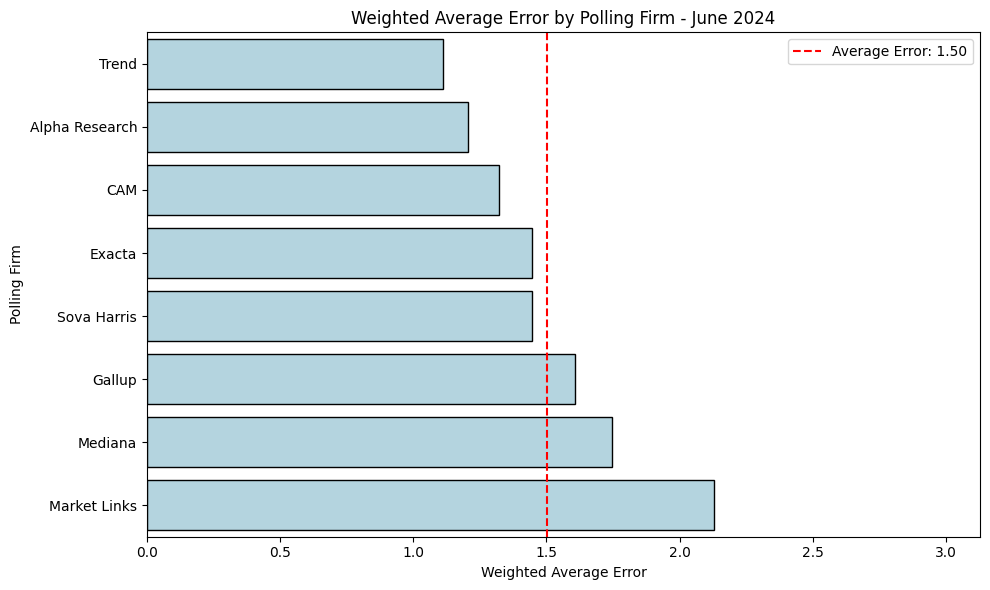

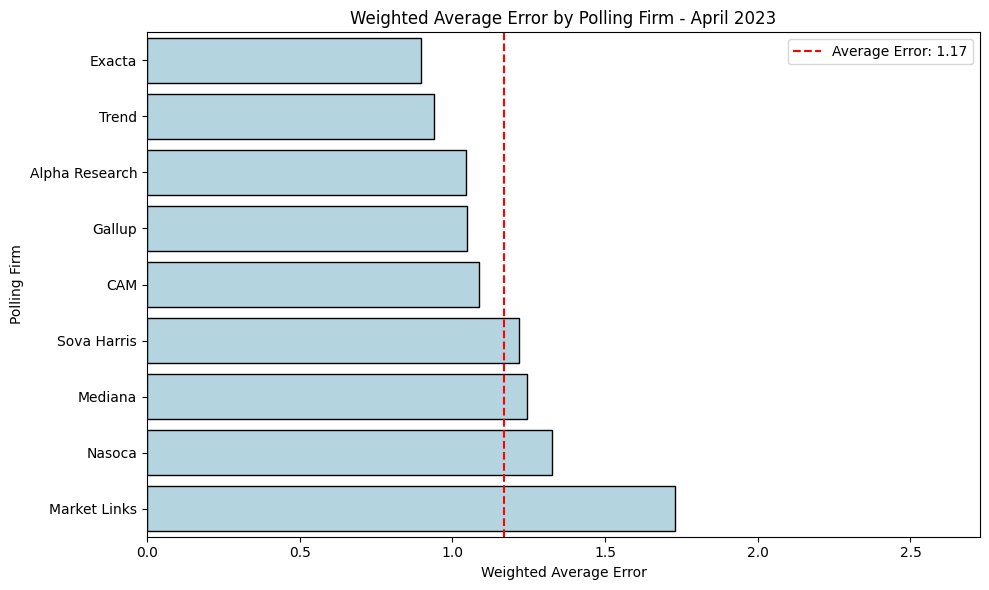

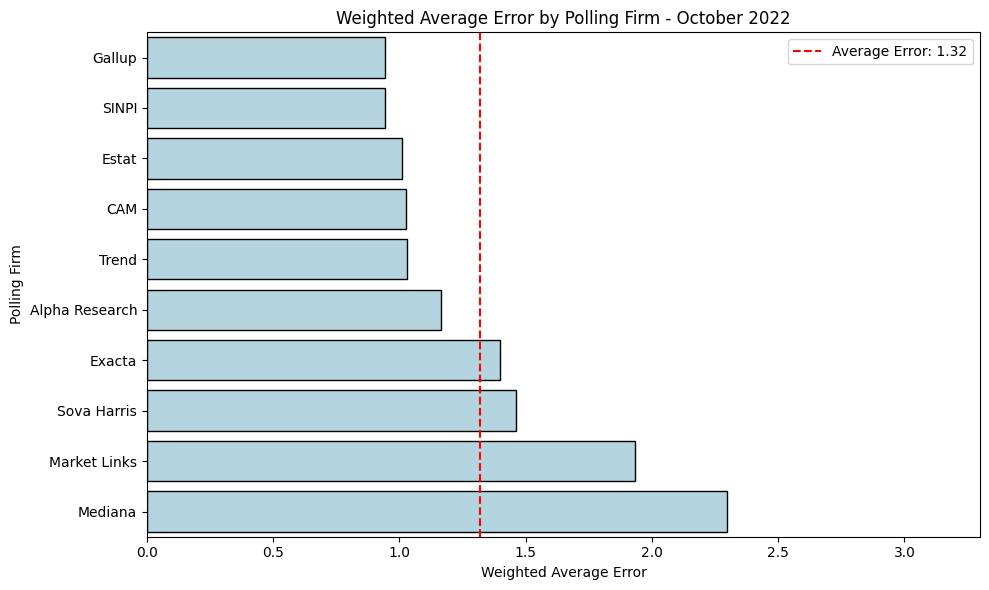

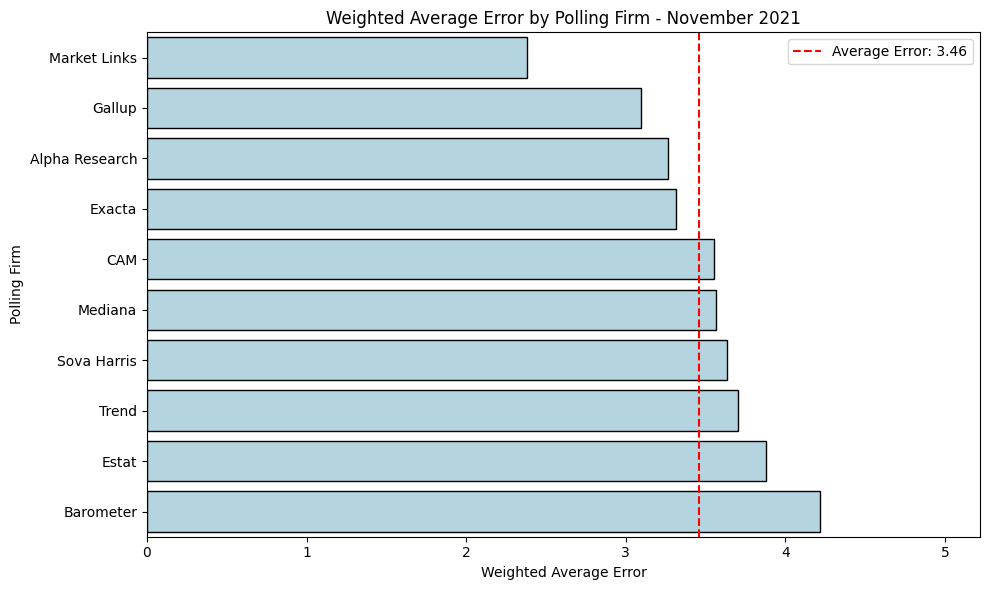

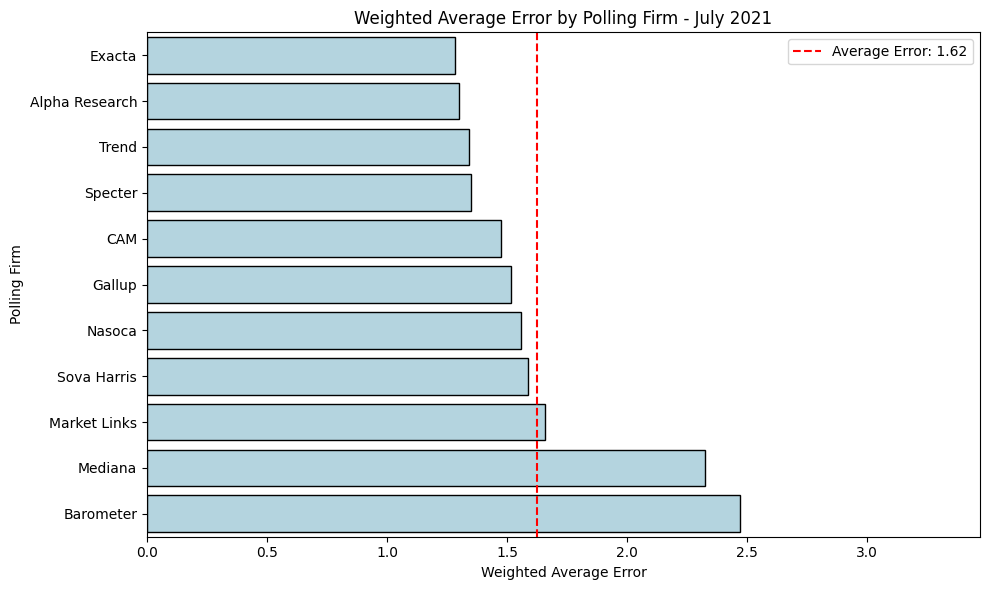

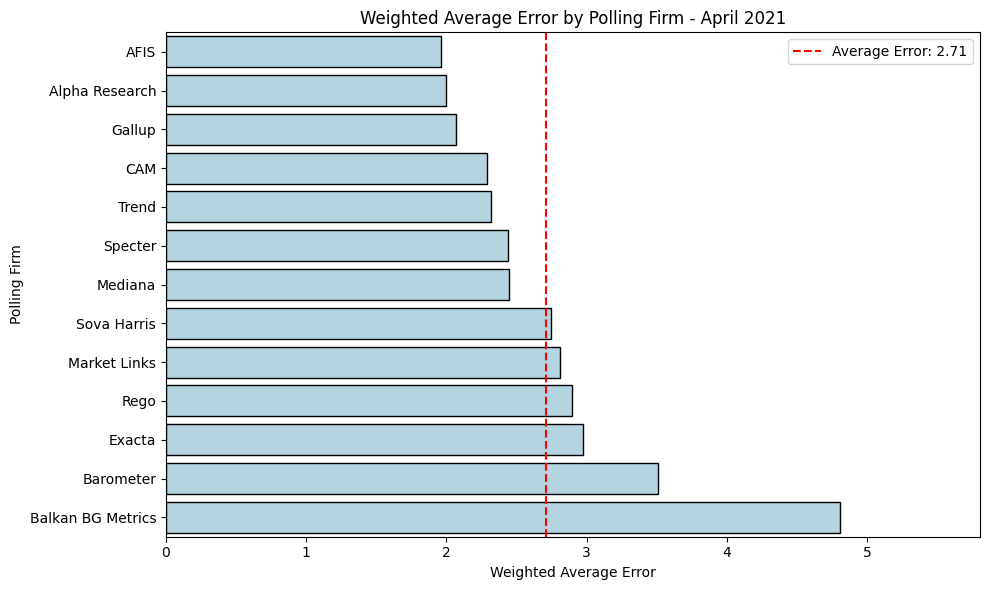

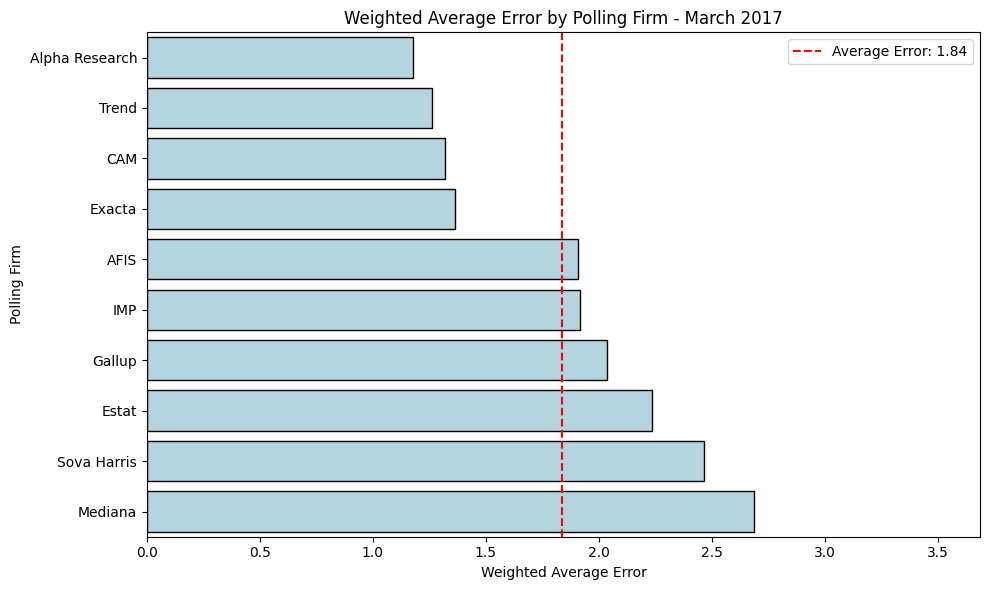

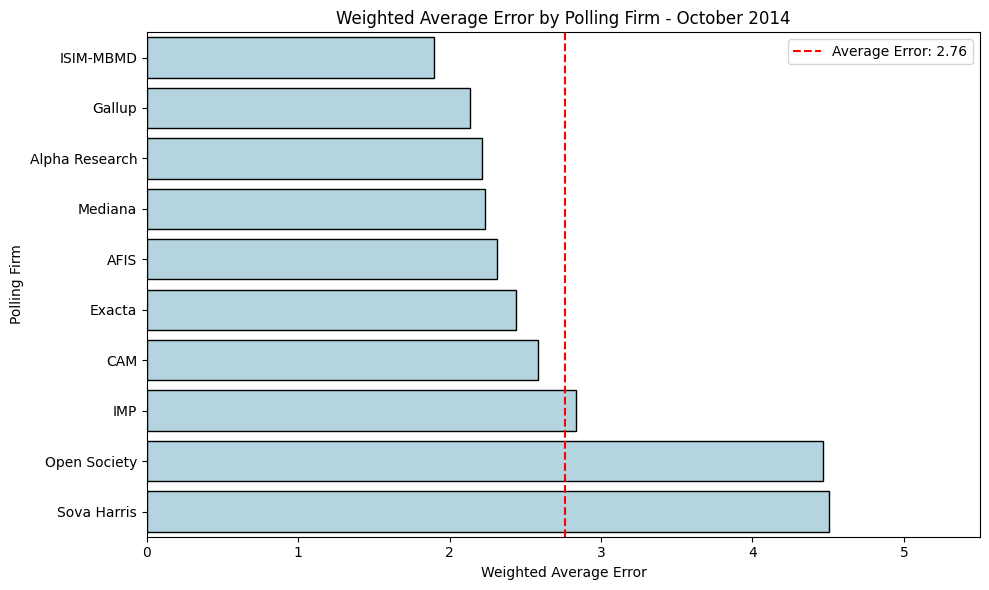

In [123]:
# Example usage
plot_weighted_average_errors(average_weighted_pollster_error, election_names)

#### Overall average error by pollster

Now, let's concatenate all of the weighted average error dataframes and calculate the overall average error for each pollster over all elections:

In [126]:
# Function to concatenate all average weighted error dataframes and calculate overall average error
def calculate_overall_average_errors(weighted_average_error_dfs):
    # Concatenate all dataframes
    concatenated_df = pd.concat(weighted_average_error_dfs, ignore_index=True)
    
    # Calculate overall average error for each polling firm
    overall_average_errors = concatenated_df.groupby('polling_firm').agg(
        Total_Weighted_Error=('Weighted Average Error', 'sum'),
        Count=('Weighted Average Error', 'size')
    ).reset_index()
    
    # Calculate the average weighted error
    overall_average_errors['Overall_Average_Error'] = overall_average_errors['Total_Weighted_Error'] / overall_average_errors['Count']
    
    # Drop intermediate columns
    overall_average_errors.drop(columns=['Total_Weighted_Error', 'Count'], inplace=True)
    
    # Sort by overall average error
    overall_average_errors = overall_average_errors.sort_values(by='Overall_Average_Error')
    
    return overall_average_errors

In [127]:
# Example usage with the list of dataframes
overall_average_errors_df = calculate_overall_average_errors(average_weighted_pollster_error)

# Display the result
print(overall_average_errors_df)

         polling_firm  Overall_Average_Error
15              SINPI               0.944444
12             Nasoca               1.441458
1      Alpha Research               1.671092
18              Trend               1.672511
7              Gallup               1.805678
4                 CAM               1.831669
6              Exacta               1.888633
17            Specter               1.894861
9           ISIM-MBMD               1.897500
0                AFIS               2.061309
10       Market Links               2.105429
11            Mediana               2.318073
5               Estat               2.374938
8                 IMP               2.376539
16        Sova Harris               2.382431
14               Rego               2.892222
3           Barometer               3.397880
13       Open Society               4.467500
2   Balkan BG Metrics               4.803471


Now, let's plot it on a chart. But first, let's count in how many election cycles each pollster has participated, since this is salient information:

In [129]:
# Function to count participation in election cycles from the average weighted error dataframes
def count_participation_from_errors(weighted_error_dfs, election_names):
    # Create an empty DataFrame to store results
    participation_df = pd.DataFrame()
    
    for i, df in enumerate(weighted_error_dfs):
        # Add a column for the election cycle
        df['Election Cycle'] = election_names[i]
        
        # Concatenate into a single DataFrame
        participation_df = pd.concat([participation_df, df[['polling_firm', 'Election Cycle']]])
    
    # Count the number of unique election cycles per polling firm
    participation_count = participation_df.groupby('polling_firm')['Election Cycle'].nunique().reset_index()
    participation_count.rename(columns={'Election Cycle': 'Number of Election Cycles'}, inplace=True)
    
    return participation_count

# Example usage with the weighted error dataframes and election names
participation_count_df = count_participation_from_errors(average_weighted_pollster_error, election_names)

# Create the dictionary of pollster names and their number of election cycles
pollster_participation_dict = participation_count_df.set_index('polling_firm')['Number of Election Cycles'].to_dict()

# Create arrays
all_pollsters = list(pollster_participation_dict.keys())
one_election_pollsters = [pollster for pollster, count in pollster_participation_dict.items() if count == 1]
multiple_election_pollsters = [pollster for pollster, count in pollster_participation_dict.items() if count > 1]

In [130]:
pollster_participation_dict

{'AFIS': 3,
 'Alpha Research': 8,
 'Balkan BG Metrics': 1,
 'Barometer': 3,
 'CAM': 8,
 'Estat': 3,
 'Exacta': 8,
 'Gallup': 8,
 'IMP': 2,
 'ISIM-MBMD': 1,
 'Market Links': 6,
 'Mediana': 8,
 'Nasoca': 2,
 'Open Society': 1,
 'Rego': 1,
 'SINPI': 1,
 'Sova Harris': 8,
 'Specter': 2,
 'Trend': 7}

And now let's plot:

In [132]:
# Function to plot overall average errors with participation count for a given pollster list
def plot_overall_average_errors(overall_average_errors_df, pollster_list, pollster_participation_dict):
    """
    Plots overall average errors by polling firm for the provided pollster list
    and includes the number of election cycles they participated in.
    """
    # Filter the overall_average_errors_df to include only pollsters in the provided list
    filtered_df = overall_average_errors_df[overall_average_errors_df['polling_firm'].isin(pollster_list)].copy()
    
    # Add the number of election cycles to the filtered DataFrame using .loc to avoid the warning
    filtered_df.loc[:, 'Number of Election Cycles'] = filtered_df['polling_firm'].map(pollster_participation_dict)
    
    # Calculate the average Overall Average Error
    average_error = filtered_df['Overall_Average_Error'].mean()
    
    # Create the bar plot
    plt.figure(figsize=(12, 8))
    bar_plot = sns.barplot(x='Overall_Average_Error', y='polling_firm', data=filtered_df, color='lightblue', edgecolor='black')
    
    # Add a vertical dotted line for the average
    plt.axvline(x=average_error, color='red', linestyle='--', label=f'Average Error: {average_error:.2f}')
    
    # Adjust the y-axis labels to ensure they're based on pollster names
    for index, row in filtered_df.iterrows():
        pollster_name = row['polling_firm']
        num_cycles = pollster_participation_dict.get(pollster_name, 1)
        label = f'({num_cycles} election)' if num_cycles == 1 else f'({num_cycles} elections)'
        
        # Find the y-coordinate using the pollster's name
        y_coordinate = list(filtered_df['polling_firm']).index(pollster_name)
        bar_plot.text(row['Overall_Average_Error'] + 0.1, y_coordinate, label, va='center', ha='left', fontsize=10, color='black')
        
    # Labeling
    plt.title(f'Overall Average Error by Polling Firm ({len(pollster_list)} Pollsters)')
    plt.xlabel('Overall Average Error')
    plt.ylabel('Polling Firm')
    
    # Set the x-axis limit
    plt.xlim(0, filtered_df['Overall_Average_Error'].max() + 1)
    
    # Add a legend
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()


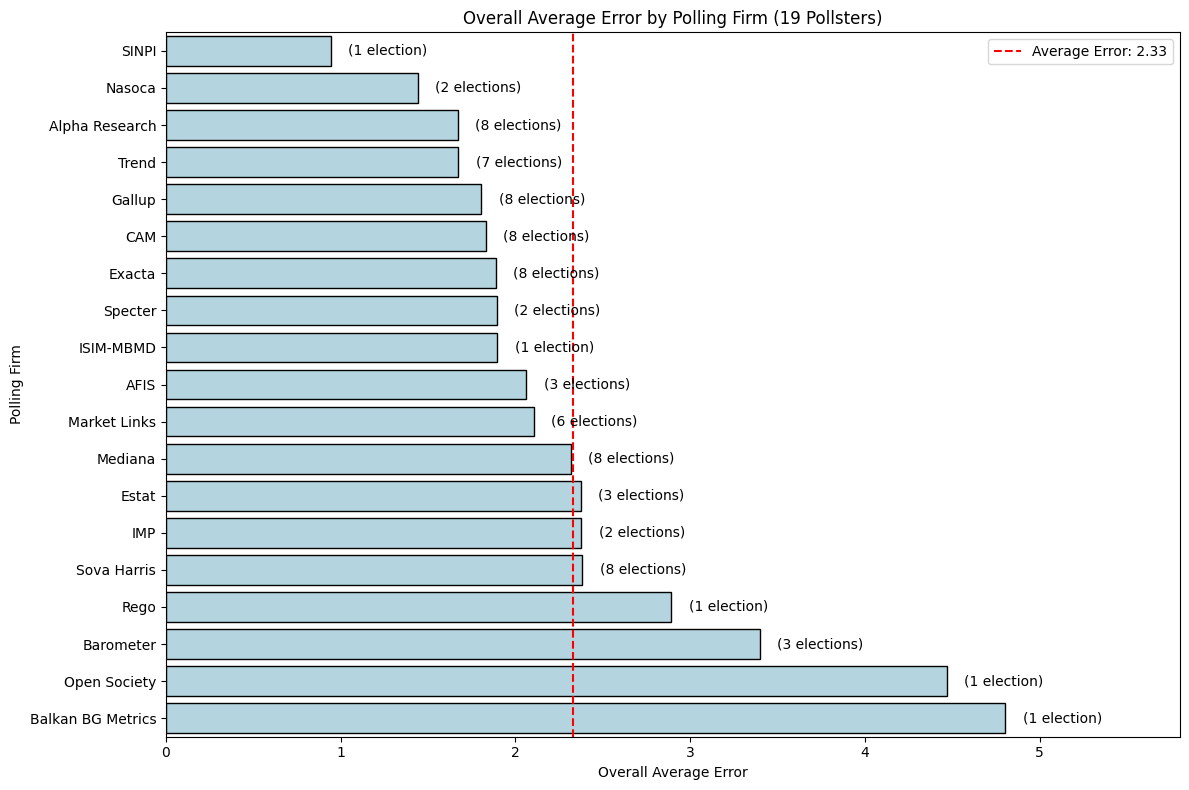

In [133]:
# Example usage with all_pollsters
plot_overall_average_errors(overall_average_errors_df, all_pollsters, pollster_participation_dict)

Pollsters that only did one election cycle seem to be pretty big outliers both in terms of good performance (SINPI) and bad performance (Rego, Open Society, Balkan BG Metrics). Let's see what this would look like (as well as the average error) for all pollsters that did more than one election cycle:

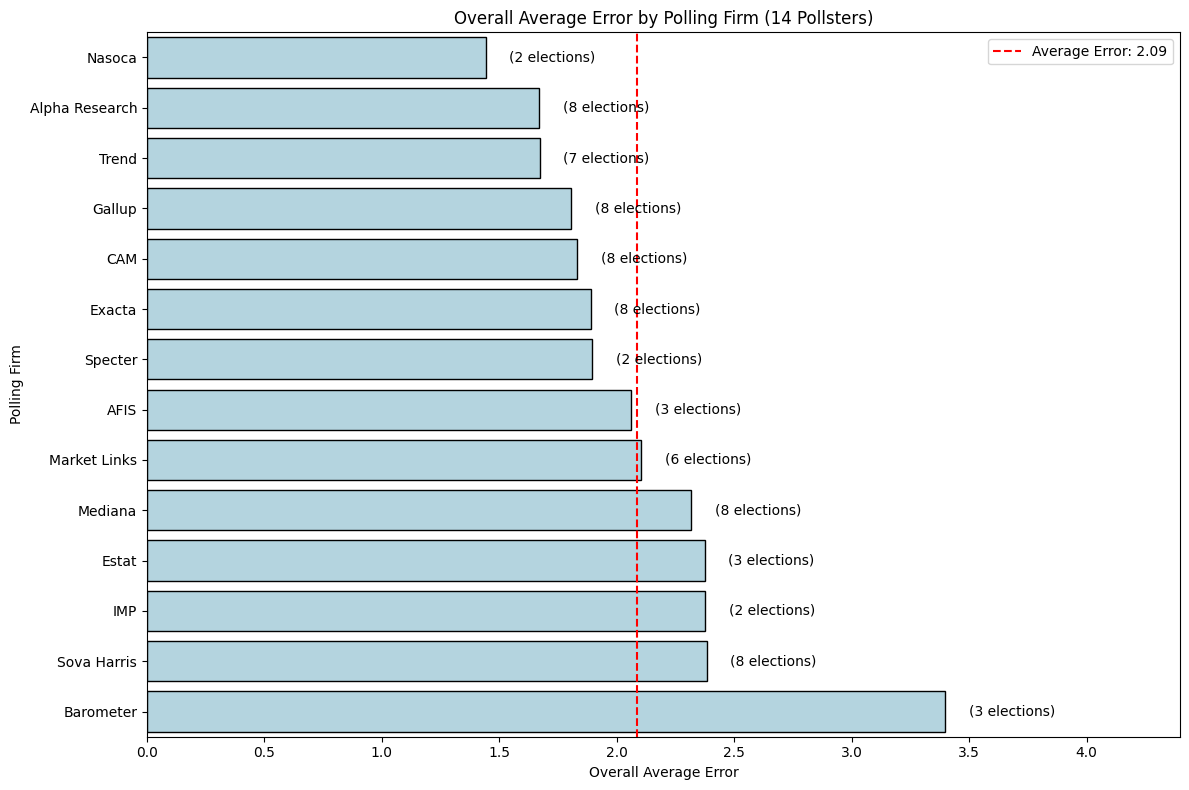

In [135]:
# Example usage with multiple_election_pollsters
plot_overall_average_errors(overall_average_errors_df, multiple_election_pollsters, pollster_participation_dict)

Okay! The average error fell from 2.33 to 2.09, and this is giving us a much clearer picture. The takeaways would be that
1. Alpha Research and Trend are the best pollster out of those that have participated in most election cycles
2. Gallup, CAM and Exacta have virtually identical performance when taken over all 8 election cycles, and they are all below the average error
3. Out of the pollsters that have participated in more than half (4) of the election cycles studied here, Mediana and Sova Harris fall over the average error, with Sova Harris being the worst.
4. The remaining pollster that has participated in more than half (4) of the election cycles - Market Links - is right on the average.

Before we move on, let's also plot the overall pollster accuracy by election cycle - it might be useful to visualize that some elections (e.g. November 2021) are just a lot less predictable than other ones (e.g. June 2024), independent of time:

In [138]:
def calculate_overall_average_errors(average_weighted_pollster_error, election_names, pollster_list):
    overall_average_errors_filtered = []
    
    for i, df in enumerate(average_weighted_pollster_error):
        # Filter the DataFrame to include only the pollsters in pollster_list
        df_filtered = df[df['polling_firm'].isin(pollster_list)]
        
        # Calculate the average of the Weighted Average Errors for each election cycle
        overall_avg_error = df_filtered['Weighted Average Error'].mean()
        overall_average_errors_filtered.append((election_names[i], overall_avg_error))
    
    # Convert to DataFrame for easier plotting
    overall_avg_error_df_filtered = pd.DataFrame(overall_average_errors_filtered, columns=['Election Cycle', 'Overall Average Error'])
    
    # Specify the exact order of election cycles
    election_order = [
        "October 2014", "March 2017", "April 2021", 
        "July 2021", "November 2021", "October 2022", 
        "April 2023", "June 2024"
    ]
    
    # Ensure the DataFrame respects this order
    overall_avg_error_df_filtered['Election Cycle'] = pd.Categorical(overall_avg_error_df_filtered['Election Cycle'], categories=election_order, ordered=True)
    overall_avg_error_df_filtered = overall_avg_error_df_filtered.sort_values('Election Cycle').reset_index(drop=True)
    
    return overall_avg_error_df_filtered

In [139]:
overall_avg_error_df_filtered = calculate_overall_average_errors(average_weighted_pollster_error, election_names, all_pollsters)

In [140]:
def plot_overall_average_error_trend_bar(overall_avg_error_df, pollster_list_name):
    """
    Plots overall average error trend bar chart for a given pollster list (e.g., all_pollsters or multiple_election_pollsters)
    """
    # Calculate the global average of all overall average errors across cycles
    global_average_error = overall_avg_error_df['Overall Average Error'].mean()
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Election Cycle', y='Overall Average Error', data=overall_avg_error_df, color='lightblue', edgecolor='black')
    
    # Add a horizontal dotted line for the average overall error
    plt.axhline(y=global_average_error, color='red', linestyle='--', label=f'Average Error: {global_average_error:.2f}')
    
    # Add value labels above the bars
    for i, row in overall_avg_error_df.iterrows():
        plt.text(i, row['Overall Average Error'] + 0.05, f'{row["Overall Average Error"]:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    
    # Labeling
    plt.title(f'Overall Average Error Across Election Cycles ({pollster_list_name})')
    plt.xlabel('Election Cycle')
    plt.ylabel('Overall Average Error')
    
    # Set y-axis limit to have a bit of space above the highest bar
    plt.ylim(0, overall_avg_error_df['Overall Average Error'].max() + 1)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add a legend
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

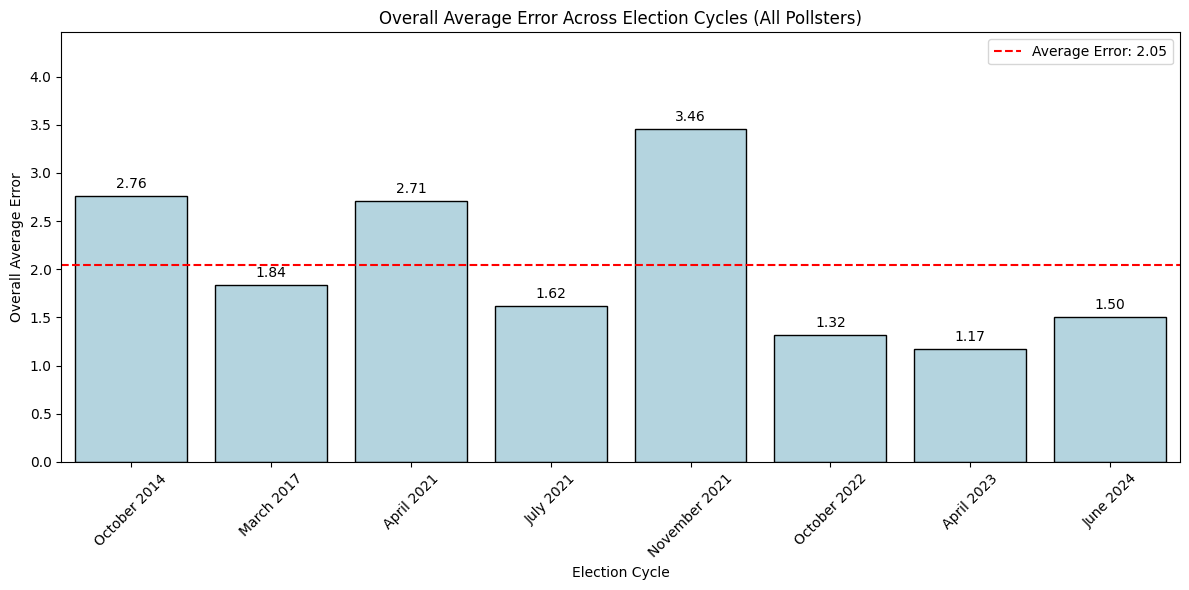

In [141]:

overall_avg_error_df_all = calculate_overall_average_errors(average_weighted_pollster_error, election_names, all_pollsters)
plot_overall_average_error_trend_bar(overall_avg_error_df_all, 'All Pollsters')

Okay, looking good! Let's just also check what happens to this chart if we once again remove pollsters that only did one election, since we saw that they are somewhat outlier-y:

In [143]:
overall_avg_error_df_multiple = calculate_overall_average_errors(average_weighted_pollster_error, election_names, multiple_election_pollsters)

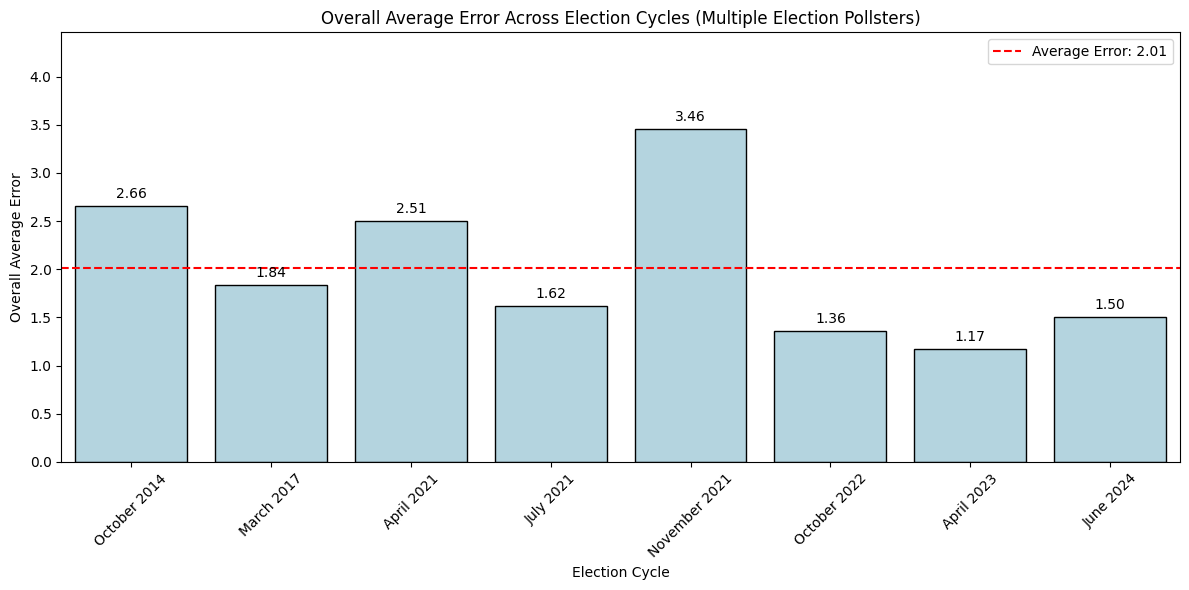

In [144]:
overall_avg_error_df_multiple = calculate_overall_average_errors(average_weighted_pollster_error, election_names, multiple_election_pollsters)
plot_overall_average_error_trend_bar(overall_avg_error_df_multiple, 'Multiple Election Pollsters')

Curiously, the chart looks rather similar, and the overall average error barely decreases - from 2.05 to 2.01. Let's see which pollsters were dropped and what elections they participated in:

In [146]:
def list_excluded_pollsters(participation_count_df, average_weighted_pollster_error, election_names):
    # Identify pollsters with single participation
    single_cycle_pollsters = participation_count_df[participation_count_df['Number of Election Cycles'] == 1]
    
    # List to store excluded pollsters and their election cycle
    excluded_pollsters = []
    
    for i, df in enumerate(average_weighted_pollster_error):
        # Filter for the pollsters that are in the single_cycle_pollsters list
        excluded_in_cycle = df[df['polling_firm'].isin(single_cycle_pollsters['polling_firm'])]
        
        # Add to the excluded pollsters list along with the election cycle
        for _, row in excluded_in_cycle.iterrows():
            excluded_pollsters.append((row['polling_firm'], election_names[i]))
    
    return excluded_pollsters

# Example usage
excluded_pollsters_list = list_excluded_pollsters(participation_count_df, average_weighted_pollster_error, election_names)

# Print the excluded pollsters
for pollster, cycle in excluded_pollsters_list:
    print(f"Pollster: {pollster}, Election Cycle: {cycle}")


Pollster: SINPI, Election Cycle: October 2022
Pollster: Rego, Election Cycle: April 2021
Pollster: Balkan BG Metrics, Election Cycle: April 2021
Pollster: ISIM-MBMD, Election Cycle: October 2014
Pollster: Open Society, Election Cycle: October 2014


It seems this is helpful, since the October 2014 and April 2021 elections have a reduced average error after excising the one-time pollsters; not so for October 2022. Anyway, let's move on!

### Pollster bias towards party families

#### Party families

We finally get to the more ambitious part of this study - measuring pollster bias against/towards specific political parties! 

However, only 3 parties have contested all 8 election cycles from the dataset - GERB (and its successor "coalition" GERB-SDS), DPS, and BSPzB. No other party has contested all 8 elections, with some existing in different variations during different elections (e.g. DB and PP contesting elections separately, before contesting another election as the united PP-DB coalition).

So, in lieu of a stable party system, we have to make do with assigning all parties from our dataset to what I will call "party families" based on parties' ideology and general comportment. The party families could be the subject of their own study, but for our purposes I will define them as follows:

- parties like RB, DB, PP, and PP-DB form the so-called "Democratic" party family, as per their usual monikers in media
- parties like Ataka, Volya, NFSB, VMRO, and Revival form the so-called "Alt Right" party family, as per their ideology
- parties like ABV, ISBG, Left and the like form the so-called "Alt Left" party family, as per their ideology
- parties like BBC, ITN and the like form the so-called "Populist" party family, since it is their defining characteristic

In addition to these 4 party families, we have the 3 established parties that contested all 8 elections:

- GERB and later GERB-SDS - we will rename all of the GERB-SDS instances to GERB for operationalization reasons
- DPS
- BSPzB - we will rename all of the BSPzB instances to BSP for historical reasons

So, let's first make the arrays of the party families, before we move any further:

In [151]:
def get_unique_columns(error_dataframes):
    unique_columns = set()  # Use a set to store unique column names
    
    for df in error_dataframes:
        # Get all column names except "Polling firm" and "Last date"
        columns = set(df.columns) - {"polling_firm", "last_date"}
        
        # Add the remaining columns to the set
        unique_columns.update(columns)
    
    # Convert the set back to a list
    unique_columns_list = list(unique_columns)
    
    return unique_columns_list

# Example usage
unique_columns_list = get_unique_columns(error_dataframes)
print(unique_columns_list)


['GERB-SDS', 'BBC', 'RB', 'BP', 'PP-DB', 'BV', 'DB', 'BL', 'BSP', 'VMRO', 'RzB', 'Volya-NFSB', 'Ataka', 'SBG', 'GERB', 'PF', 'ABV', 'SB', 'OP', 'Left', 'PP', 'ITN', 'Revival', 'Volya', 'DPS', 'ISBG']


I will create the party family arrays manually, though I'm sure there is a smarter way to do it:

In [153]:
GERB_party_family = ['GERB', 'GERB-SDS']
DPS_party_family = ['DPS'] # we don't need this, but I'm doing it for completeness
BSP_party_family = ['BSP'] # we also don't need this
Democratic_party_family = ['SB', 'PP', 'PP-DB', 'RB', 'DB']
Alt_Right_party_family = ['Volya', 'BV', 'VMRO', 'BP', 'Revival', 'Volya-NFSB', 'Ataka', 'OP', 'PF', 'RzB']
Alt_Left_party_family = ['Left', 'ISBG', 'SBG', 'ABV']
Populist_party_family = ['ITN', 'BBC', 'BL']

# I am aware that these don't necessarily follow the pythonic naming convetion
# but I don't have the patience to come up with a better way to name them

Let's quickly check that I haven't missed anything:

In [155]:
# Combine all the party family lists into one set
combined_party_families = set(GERB_party_family + DPS_party_family + BSP_party_family +
                              Democratic_party_family + Alt_Right_party_family +
                              Alt_Left_party_family + Populist_party_family)

# Create a set from the unique columns list
unique_columns_set = set(unique_columns_list)

# Find members in unique_columns_list that are not in any of the specified lists
not_in_any_list = unique_columns_set - combined_party_families

# Print the results
print("Members of unique_columns_list not found in any specified list:", not_in_any_list)


Members of unique_columns_list not found in any specified list: set()


Seems like I haven't missed anything!

Okay, now we will go through the error dataframes and rename the party columns so that they include the moniker of their respective party family, so that the party column "PP-DB" becomes "PP-DB (Democratic)", "ISBG" becomes "ISBG (Alt Left)" and so on:

In [158]:
# Create a mapping dictionary for party to party family
party_family_mapping = {}
party_family_mapping.update({party: "GERB" for party in GERB_party_family})
party_family_mapping.update({party: "DPS" for party in DPS_party_family})
party_family_mapping.update({party: "BSP" for party in BSP_party_family})
party_family_mapping.update({party: "Democratic" for party in Democratic_party_family})
party_family_mapping.update({party: "Alt Right" for party in Alt_Right_party_family})
party_family_mapping.update({party: "Alt Left" for party in Alt_Left_party_family})
party_family_mapping.update({party: "Populist" for party in Populist_party_family})

# Define the function to rename party columns
def rename_party_columns(df, mapping_dict):
    new_columns = {}
    for column in df.columns:
        # Check if the column name is in the mapping dictionary
        if column in mapping_dict:
            new_name = f"{column} ({mapping_dict[column]})"
            new_columns[column] = new_name
        else:
            new_columns[column] = column
    # Rename columns based on the new_columns dictionary
    df.rename(columns=new_columns, inplace=True)
    return df

# Example usage with the error_dataframes
# Assuming error_dataframes is a list of DataFrames
party_family_error_dataframes = [rename_party_columns(df, party_family_mapping) for df in error_dataframes]

Let's see how we did with the first dataframe, the June 2024 election:

In [160]:
# Print out the columns of the first dataframe to check the renaming
print(party_family_error_dataframes[0].columns)

Index(['polling_firm', 'last_date', 'GERB-SDS (GERB)', 'PP-DB (Democratic)',
       'Revival (Alt Right)', 'DPS (DPS)', 'BSP (BSP)', 'ITN (Populist)',
       'BV (Alt Right)', 'Left (Alt Left)', 'SBG (Alt Left)',
       'SB (Democratic)'],
      dtype='object')


Looks good! Let's move on.

The next step is to merge all of the party_family_error_dataframes such that we end up with a column for each unique party (whose name includes the party name and the party family) for each poll for each election cycle in one dataframe. 

Then we will go over each poll and sum the columns of parties from the same family, for example:

- in poll A by pollster X, PP (Democratic) has an error of -3 and DB (Democratic) has an error of +1
- there are no other Democratic parties in this poll
- we sum up -3 and +1 to get -2

Then, we do the same for all polls by pollster X:

- in poll B by pollster X, DB (Democratic) has an error of -1 and RB (Democratic) has an error of +2; PP doesn't exist
- we sum up -1 and +2 to get +1

Once we have done this for all polls by the same pollster, we sum the results and divide them by the number of polls:

- we sum up -2 and +1 to get -1
- we divide -1 by the number of polls (2) and get -0.5
- this gives us a (very crude) approximation of the bias that each pollster has against/towards each party family over all polls that they have conducted

Okay, let's do it and see if it makes sense at all!

In [163]:
def combine_party_family_error_dataframes(error_dataframes):
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(error_dataframes, ignore_index=True)
    return combined_df

In [164]:
combined_error_df = combine_party_family_error_dataframes(party_family_error_dataframes)
combined_error_df.head()

,polling_firm,last_date,GERB-SDS (GERB),PP-DB (Democratic),Revival (Alt Right),DPS (DPS),BSP (BSP),ITN (Populist),BV (Alt Right),Left (Alt Left),...,RzB (Alt Right),ABV (Alt Left),Ataka (Alt Right),Volya-NFSB (Alt Right),GERB (GERB),OP (Alt Right),RB (Democratic),Volya (Alt Right),BBC (Populist),PF (Alt Right)
0,Alpha Research,2024-06-04,0.39,1.07,1.42,-2.26,1.04,0.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CAM,2024-06-04,1.69,2.27,0.72,-2.06,1.34,-0.66,1.23,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exacta,2024-06-04,1.69,1.17,1.02,-2.46,1.94,0.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gallup,2024-06-04,1.19,1.37,1.72,-1.76,0.94,0.14,0.43,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Trend,2024-06-04,1.79,0.97,1.32,-2.16,1.44,-0.06,0.53,0.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Okay, we've successfully made a single dataframe having rows for each poll and columns for each party that ever contested an election, with the party family included in the column name. Now, let's do the calculations - I'm purposefully leaving the debugging statements in the code if need be, but I'm commenting them out:

In [166]:
def calculate_bias_by_party_family(combined_df):
    # Extract unique party families
    party_families = set(party_family_mapping.values())
    
    # Initialize a list to collect result dataframes
    result_list = []
    
    # Group by polling firm
    grouped = combined_df.groupby('polling_firm')
    
    for pollster, group in grouped:
        # print(f"Processing Polling Firm: {pollster}")
        
        # Initialize sums and counts for each party family
        family_sums = {family: 0 for family in party_families}
        counts = {family: 0 for family in party_families}
        
        # Initialize list to store errors for each poll
        poll_results_list = []
        
        for index, row in group.iterrows():
            # print(f"Processing Poll: {index}")
            # Initialize row sums for each party family
            row_sums = {family: 0 for family in party_families}
            
            # Sum the errors for each party family
            for party_family in party_families:
                # Find columns for the current party family
                family_columns = [col for col in group.columns if f"({party_family})" in col]
                
                if family_columns:
                    row_sums[party_family] = row[family_columns].sum()
            
            # Append row sums to the list
            poll_results_list.append(row_sums)
        
        # Create DataFrame from the list of row sums
        poll_results = pd.DataFrame(poll_results_list)
        
        # Print out the DataFrame with sums for each poll
        # print("Poll Results:\n", poll_results)
        
        # Sum the errors across all polls
        total_sums = poll_results.sum()
        poll_count = len(group)
        
        # Print out the total sums for debugging
        # print("Total Sums:\n", total_sums)
        
        # Compute average errors for each party family
        averages = {family: total_sums[family] / poll_count if poll_count > 0 else 0 for family in party_families}
        
        # Append result as a DataFrame
        result_df = pd.DataFrame([{'polling_firm': pollster, **averages}])
        result_list.append(result_df)
    
    # Combine all results into a single DataFrame
    final_results = pd.concat(result_list, ignore_index=True)
    
    # Group by polling firm to calculate final average biases
    final_results = final_results.groupby('polling_firm').mean().reset_index()

    # Round the results to two decimal places
    final_results = final_results.round(2)
    
    return final_results

# Example usage
bias_df = calculate_bias_by_party_family(combined_error_df)
bias_df


,polling_firm,Alt Left,Alt Right,Democratic,GERB,BSP,DPS,Populist
0,AFIS,1.33,-0.65,-2.27,-0.81,5.67,-1.50,-1.10
1,Alpha Research,0.97,0.10,-0.62,-0.02,2.54,-1.06,-1.09
2,Balkan BG Metrics,-1.54,8.64,-5.05,0.12,4.72,-1.38,-11.18
3,Barometer,-0.04,1.96,-6.40,3.52,5.12,-1.01,-4.77
4,CAM,0.11,-0.93,-2.24,-0.92,2.70,-1.07,-1.89
5,Estat,0.63,2.83,-3.14,-0.79,1.80,-2.85,1.21
6,Exacta,0.29,-0.83,-1.56,0.24,2.78,-2.00,-0.50
7,Gallup,0.60,0.80,-0.90,-0.95,2.40,-0.71,-0.86
8,IMP,1.59,-1.03,-2.27,-1.86,2.93,-3.46,0.23
9,ISIM-MBMD,-1.35,-2.40,-2.29,3.43,3.20,1.46,-0.89


Wonderful! We can see some pretty interesting datapoints (e.g. the insane biases of one-election pollster Balkan BG Metrics), but let's try to chart this in order to more easily take in the information.

#### Charting pollster bias

In [169]:
def plot_bias_by_party_family(bias_df, overall_average_errors, pollster_list):
    """
    Plots the bias by party family for a given set of polling firms (all_pollsters or multiple_election_pollsters).
    
    Parameters:
    - bias_df: DataFrame containing bias by party family data
    - overall_average_errors: DataFrame containing overall average errors
    - pollster_list: List of pollsters to be included in the plot (e.g., all_pollsters, multiple_election_pollsters)
    """
    # Filter the DataFrame to include only the pollsters in the pollster_list
    bias_df_filtered = bias_df[bias_df['polling_firm'].isin(pollster_list)]
    
    # Define the desired order of party families
    order = [
        'Alt Left',
        'BSP',
        'Populist',
        'DPS',
        'Democratic',
        'GERB',
        'Alt Right'
    ]
    
    # Reorder the DataFrame columns
    party_families = order
    bias_df_filtered = bias_df_filtered[['polling_firm'] + party_families]
    
    # Merge the bias_df with overall_average_errors to include the error values
    merged_df = pd.merge(bias_df_filtered, overall_average_errors, on='polling_firm', how='left')
    
    # Sort the DataFrame by 'Overall_Average_Error' in descending order
    sorted_df = merged_df.sort_values(by='Overall_Average_Error', ascending=False).reset_index(drop=True)
    
    # Set up the figure and axes
    num_party_families = len(party_families)
    plt.figure(figsize=(14, 10))
    ax = plt.gca()
    
    # Set the y-axis to be the Polling firms
    ax.set_yticks(range(len(sorted_df)))
    ax.set_yticklabels(sorted_df['polling_firm'])
    
    # Set the x-axis to be the party families with extra space between columns
    x_positions = np.arange(num_party_families) * 2  # Multiply by 2 to increase spacing
    ax.set_xticks(x_positions)
    ax.set_xticklabels(party_families, rotation=0, ha='center', fontsize=10)  # Labels horizontal and centered, font size set
    
    # Define the x-axis limits
    max_error = sorted_df[party_families].abs().max().max() + 2  # Maximum absolute error across all party families

    for i, row in sorted_df.iterrows():
        for j, party_family in enumerate(party_families):
            error = row[party_family]
            if error != 0:
                # Determine position on the x-axis
                x_pos = x_positions[j]
                
                # Calculate the dot's position relative to the 0-error line
                relative_position = (error / max_error) * 1  # Scale between -1 and 1

                # Plot the white dot with a black outline at the 0-error line
                ax.plot(x_pos, i, color='black', marker='o', markersize=8, markeredgewidth=2, markerfacecolor='white')

                if error > 0:
                    # Plot dot for positive error
                    ax.plot(x_pos + relative_position, i, color='green', marker='o', markersize=8)
                    # Draw a colored line from the white dot (0) to the green dot
                    ax.plot([x_pos, x_pos + relative_position], [i, i], color='green', linestyle='-', linewidth=1)
                    # Annotate with the error value, including a '+' sign for positive errors
                    ax.text(x_pos + relative_position / 2, i + 0.2, f"+{error:.2f}", ha='center', va='bottom', fontsize=10)
                else:
                    # Plot dot for negative error
                    ax.plot(x_pos + relative_position, i, color='red', marker='o', markersize=8)
                    # Draw a colored line from the white dot (0) to the red dot
                    ax.plot([x_pos, x_pos + relative_position], [i, i], color='red', linestyle='-', linewidth=1)
                    # Annotate with the error value
                    ax.text(x_pos + relative_position / 2, i + 0.2, f"{error:.2f}", ha='center', va='bottom', fontsize=10)

    # Add vertical dotted lines for 0-error and heavy borders between columns
    for j in range(len(party_families)):
        ax.axvline(x=x_positions[j], color='gray', linestyle='--', linewidth=1)
        if j < len(party_families) - 1:
            # Add a heavy border line at the end of each column
            ax.axvline(x=x_positions[j] + 1, color='black', linestyle='-', linewidth=2)

    # Labeling
    plt.title('Bias by Party Family for Each Polling Firm', fontsize=16, fontweight='bold', pad=100)  # Bigger and bold title
    plt.xlabel('Party Family', fontsize=12, fontweight='bold', labelpad=15, color='black', style='italic')  # Differentiated X-axis label
    plt.ylabel('Polling Firm', fontsize=12, fontweight='bold', labelpad=15, color='black', style='italic')  # Differentiated Y-axis label
    
    # Add x-axis labels at the bottom (horizontal with same font size)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(party_families, rotation=0, ha='center', fontsize=10)  # Same font size for both top and bottom labels
    
    # Add x-axis labels at the top (horizontal with same font size)
    for pos, label in zip(x_positions, party_families):
        ax.text(pos, len(sorted_df) + 1, label, ha='center', va='bottom', fontsize=10, rotation=0)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)  # Adjust the top space to ensure the title is well placed
    
    plt.show()

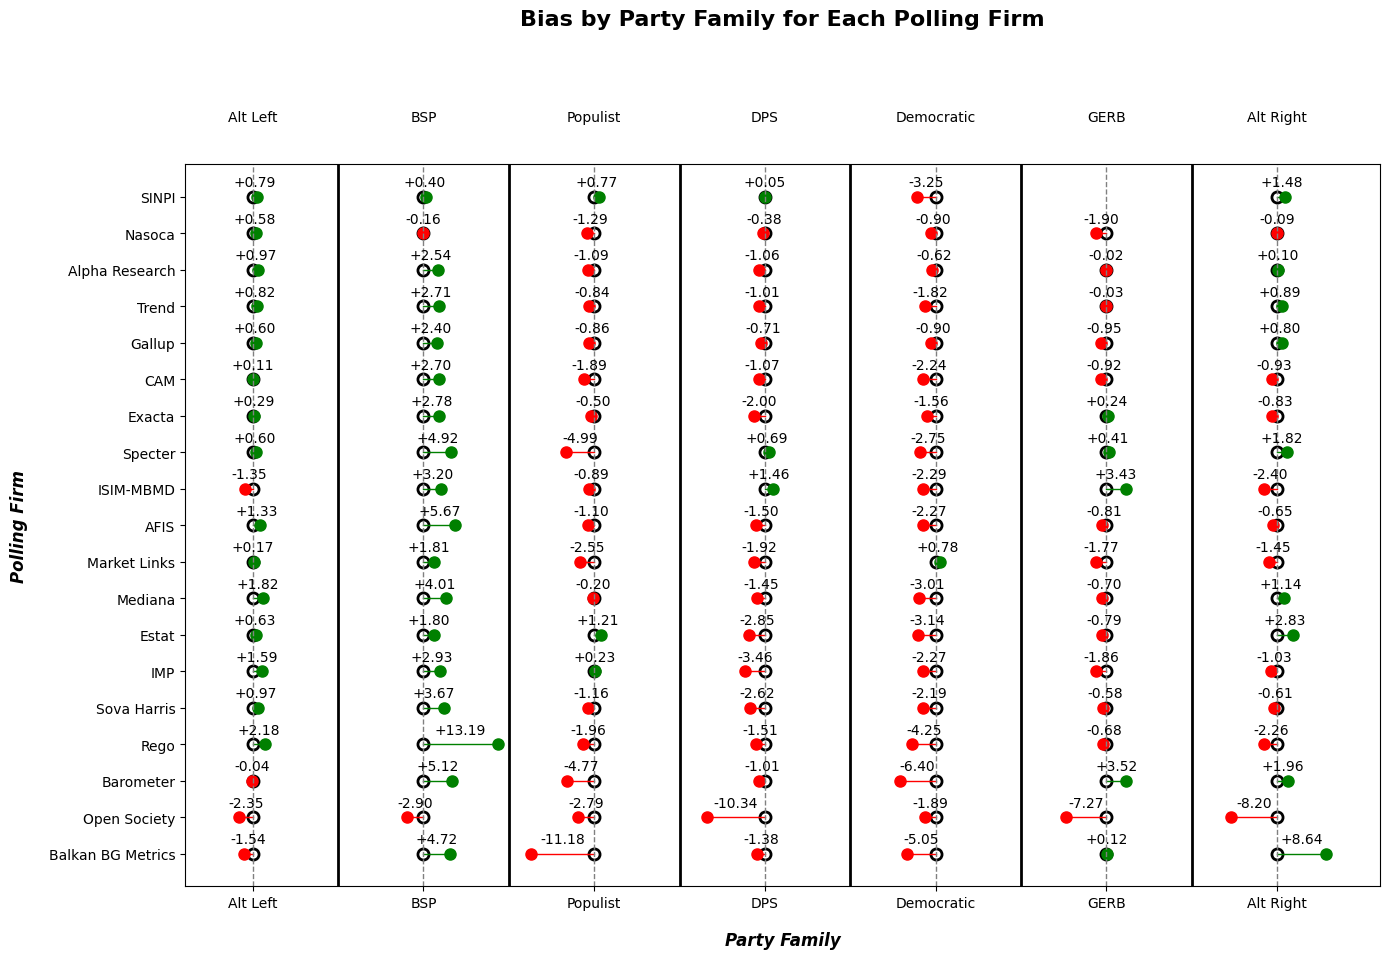

In [170]:
plot_bias_by_party_family(bias_df, overall_average_errors_df, all_pollsters)

Okay, that's good! We can glean a lot already, but we're still running into the problem of one-election pollsters (like Balkan BG Metrics) having drammatically big errors which force us to use a bigger scale. Let's once again excise the one-election pollsters and see what we get:

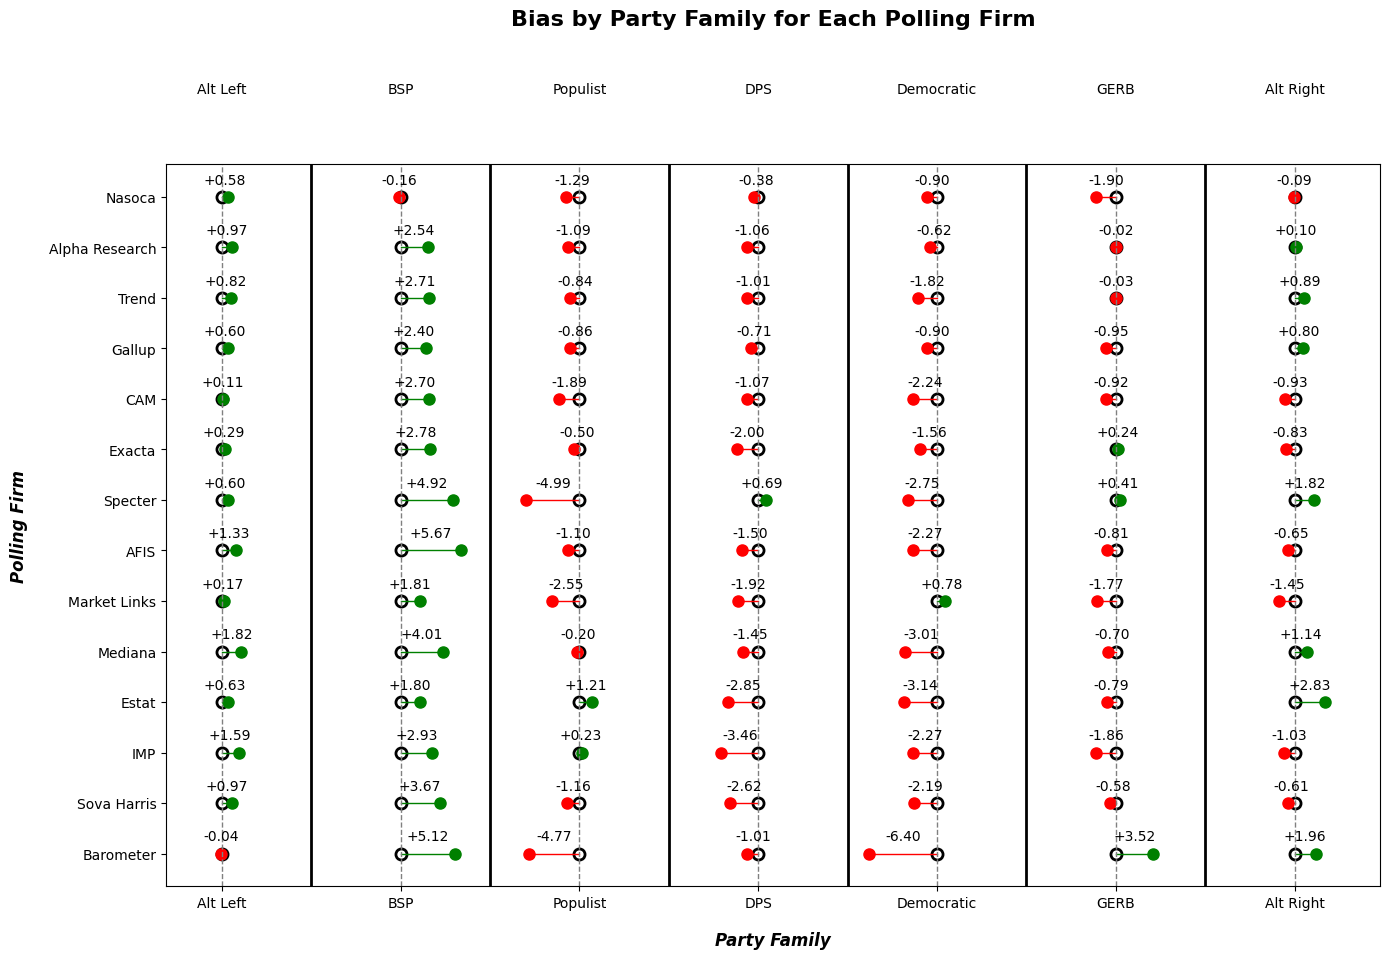

In [172]:
plot_bias_by_party_family(bias_df, overall_average_errors_df, multiple_election_pollsters)

There are still a few things I'd love to change about this poll, but I haven't been able to:

- for an unknown reason the left-most column is slightly thinner than the rest, specifically it's negative-error side
- I would love to add color-coded rectangles behind the X-axis labels for easy identification of party families, but I haven't been able to
- the top X-axis labels should be a bit lower down, but I'm just tired of dealing with this

Let's also quickly see what the overall average bias against/towards party families is (excluding one-election pollsters), though I doubt it would be of much practical use:

In [175]:
# Function to filter pollsters based on a list and calculate overall average bias
def calculate_overall_bias(bias_df, pollster_list):
    # Filter the bias_df to include only the pollsters from the provided list
    filtered_bias_df = bias_df[bias_df['polling_firm'].isin(pollster_list)]
    
    # Drop the 'Polling firm' column for aggregation
    bias_values = filtered_bias_df.drop(columns='polling_firm')
    
    # Sum the errors across all remaining pollsters
    total_bias = bias_values.sum()
    
    # Number of pollsters included in the filtered dataframe
    num_pollsters = len(filtered_bias_df)
    
    # Calculate the average bias for each party family
    average_bias = total_bias / num_pollsters if num_pollsters > 0 else pd.Series([0] * len(total_bias), index=total_bias.index)
    
    # Create a DataFrame with the overall bias
    overall_bias_df = pd.DataFrame([average_bias], columns=bias_values.columns)
    
    return overall_bias_df

In [176]:
# Example usage with multiple_election_pollsters
overall_bias_multiple = calculate_overall_bias(bias_df, multiple_election_pollsters)
print("Overall Bias for Multiple Election Pollsters:")
print(overall_bias_multiple)

Overall Bias for Multiple Election Pollsters:
   Alt Left  Alt Right  Democratic  GERB       BSP       DPS  Populist
0  0.745714   0.282143   -2.092143 -0.44  3.064286 -1.453571 -1.414286


Over all pollsters that predicted more than one election, over all 8 elections from 2014 to 2024, the biases are very low, with only BSP being an outlier (because of unexpectedly bad performances). That's not too useful, but why not have it. Let's move on.

#### De-biasing model

Sadly I am not able to go forward with this part of the study, as it is beyond my capabilities. But, based on the dataframe we now have on pollster bias towards party families, one could create a de-biasing model that would take in this dataframe, train on the error dataframes, and be tested on old (first) and then new (hopefully soon enough) polling data. In the best case scenario, such a model would be used to de-bias future polls in order to make a more accurate prediction, which might be especially useful in the context of a polling aggregator akin to 538 or Politico's Poll of Polls.

## Conclusion

In this study, we undertook a comprehensive analysis of Bulgarian parliamentary election polls spanning from 2014 to 2024. Our methodology involved several key steps, including the collection and refinement of election results and polling data, error calculation for each poll, and an assessment of pollster accuracy and biases.

### Key Findings

**Pollster Outliers**: We identified several pollsters who only participated in a single election cycle. Among these, we observed a notable variance in accuracy. While most of these outliers exhibited significant inaccuracies, there was one exception—a pollster that demonstrated exceptional precision. This highlights the variability in pollster performance and the potential for anomalies in polling data.

**Overall Accuracy of Pollsters**: Our analysis revealed the overall accuracy of Bulgarian election pollsters. By calculating the weighted average error for each pollster across all elections, we gained insights into how consistently pollsters performed. This measure provides a benchmark for evaluating the reliability of different pollsters over multiple election cycles.

**Biases Against/Towards Party Families**: We assessed each pollster's bias towards various "party families." By analyzing the errors related to different party families, we could quantify how pollsters' predictions skewed towards or against specific groups. This bias measurement is crucial for understanding the systematic tendencies in pollster performance and offers a clearer picture of their overall tendencies.

### Future Implications

The insights gained from this study could pave the way for future research aimed at developing a de-biasing model. Such a model could enhance the accuracy of future polls by correcting systematic biases, thereby improving predictions. This would be especially beneficial for polling aggregators, akin to 538 or Politico's Poll of Polls, where aggregated and unbiased polling data is crucial for accurate election forecasting.

Overall, this study provides a detailed assessment of pollster accuracy and biases, offering valuable information for both current analysis and future enhancements in polling methodologies.

## What I could have done better

In order to submit this on time, I'm stopping work here. But I very much intend to finish and polish this project, as it has been a goal of mine to create a de-biasing poll aggregator for Bulgarian elections for a while, and that's why I made the alpha version of [VoteVis](https://vote-vis-alpha.vercel.app) back in 2023.

That said, I have doubtless made many more mistakes than I realize or remember. Still, here are things that I will change when I come back to this project, in no particular order:

- I realize that the **writing "style" of this study is all over the place**, starting off as a serios academic piece and morphing into more of a casual Medium-style coding adventure. This goes hand-in-hand with the lack of a target audience in the back of my head as I was writing this. In real life, I would like to prepare this for publication online, targeted mostly at journalists (who usually have good knowledge of the political landscape, and less good knowledge of statistics) and savvy voters, and write accordingly.
- The same goes for **sub-par introducing/explaining/labeling charts** in this project. I would make sure that they not only follow the same style and convention, but are also crystal-clear in explaining what is shown. This would also have to be tested on people.
- Similarly, in things I have written for publication I go out of my way to **draw the attention of the reader to keywords, topic sentences**, and so on. I haven't done that here simply because I ran out of time.
- I'm sure the **naming of variables, columns and so on** leaves much to be desired. Having done this as essentially a first draft, I can go back and consciously think about names that make sense, are descriptive, and follow the pythonic naming convention.
- When I prepare this for publication, I will put away all of the data collection, tidying and cleaning in an optionally accessible **appendix**, and only briefly explain the process (in a paragraph or so) before presenting the meat of the study.
- Inevitably, this study's **accuracy is limited by the quality of the input data**, which has been sourced from Wikipedia for the lack of a better way, since the primary sources publish election polling data in more ways than I can count.
- And last but certainly not least, I wish I could be more certain about the methods I'm using in order to calculate errors and all possible manner of averages. The fact is I looked for sources on this and found it difficult to find anything useful. Most practicing pollsters/aggregators don't publish their methods, and psephology mostly deals with electoral systems as opposed to election polls. I did download 7 or 8 scientific papers that looked vaguely promising, but I ended up not reading them and just forging ahead because I need to finish this in time. All this to say, **any notes on the actual stats methods used would be MUCH appreaciated!**

## References

Boukouras, A., Jennings, W., Li, L., & Maniadis, Z. (2023). Can biased polls distort electoral results? evidence from the lab. European Journal of Political Economy, 78, 102383. https://doi.org/10.1016/j.ejpoleco.2023.102383

Jackson, N. (2016). The rise of poll aggregation and election forecasting. Oxford Handbooks Online. https://doi.org/10.1093/oxfordhb/9780190213299.013.28 

Pitas, K. (2023, July 19). Europepolls: A Dataset of Country-Level Opinion Polling Data for the European Union and the UK. arXiv.org.  https://doi.org/10.48550/arXiv.2307.10022 

Shugart, M. S., & Taagepera, R. (2017). Votes from Seats: Logical Models of Electoral Systems. Cambridge: Cambridge University Press.